#3) CNN from scratch

Iteration: 00000 - Training Loss: 5.78942
Iteration: 00001 - Training Loss: 4.93530
Iteration: 00002 - Training Loss: 4.31466
Iteration: 00003 - Training Loss: 3.82530
Iteration: 00004 - Training Loss: 3.42730
Iteration: 00005 - Training Loss: 3.12114
Iteration: 00006 - Training Loss: 2.88994
Iteration: 00007 - Training Loss: 2.71838
Iteration: 00008 - Training Loss: 2.59311
Iteration: 00009 - Training Loss: 2.50289
Iteration: 00010 - Training Loss: 2.43873
Iteration: 00011 - Training Loss: 2.39417
Iteration: 00012 - Training Loss: 2.36304
Iteration: 00013 - Training Loss: 2.34140
Iteration: 00014 - Training Loss: 2.32647
Iteration: 00015 - Training Loss: 2.31627
Iteration: 00016 - Training Loss: 2.30939
Iteration: 00017 - Training Loss: 2.30484
Iteration: 00018 - Training Loss: 2.30190
Iteration: 00019 - Training Loss: 2.30008


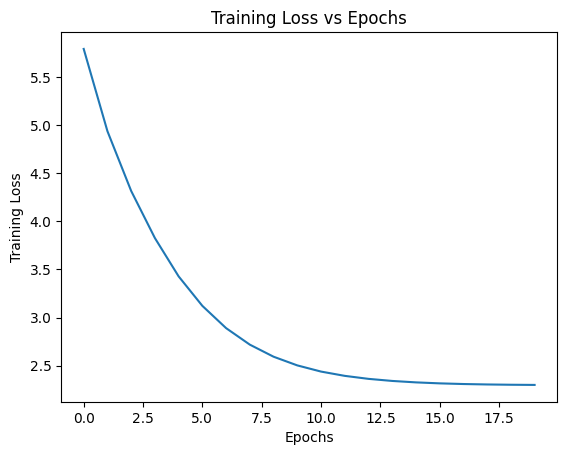

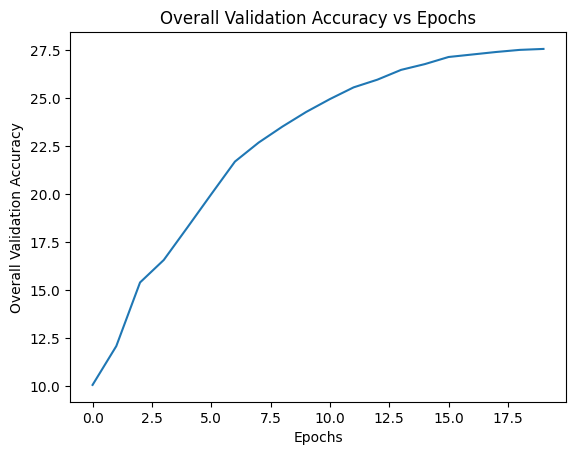

Class 0 Accuracy: 20.10000
Class 1 Accuracy: 29.40000
Class 2 Accuracy: 8.80000
Class 3 Accuracy: 9.90000
Class 4 Accuracy: 14.40000
Class 5 Accuracy: 13.40000
Class 6 Accuracy: 29.40000
Class 7 Accuracy: 22.70000
Class 8 Accuracy: 33.20000
Class 9 Accuracy: 19.50000


In [9]:
# Read the cifar10 dataset

import numpy as np
# import matplotlib.pyplot as plt
import os
import pickle
import time

# Load the dataset using numpy
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# Load the dataset using numpy
def load_cifar10_data(data_dir):
    train_data = None
    train_labels = []

    for i in range(1, 6):
        data_dic = unpickle(data_dir + '/data_batch_' + str(i))
        if i == 1:
            train_data = data_dic[b'data']
        else:
            train_data = np.vstack((train_data, data_dic[b'data']))
        train_labels += data_dic[b'labels']

    test_data_dic = unpickle(data_dir + '/test_batch')
    test_data = test_data_dic[b'data']
    test_labels = test_data_dic[b'labels']

    return train_data, train_labels, test_data, test_labels






# load the cifar10 dataset


# Load the dataset
cifar10_dir = '/content/drive/MyDrive/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_cifar10_data(cifar10_dir)


# preprocess the data by normalizing the pixel values and reshaping the data:
# 1. Normalize the pixel values to be between 0 and 1
X_train = X_train.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255

# 2. Reshape the data from a 1-D array of 3072 elements to a 3-D array of 32x32x3
X_train = X_train.reshape((-1, 3, 32, 32)).transpose(0, 2, 3, 1)
X_test = X_test.reshape((-1, 3, 32, 32)).transpose(0, 2, 3, 1)

# 3. Convert the labels from numeric to one-hot encoding

# Define the function to convert numeric labels to one hot labels
def convert_labels_to_one_hot(labels):
    one_hot_labels = np.zeros((len(labels), 10))
    for i, l in enumerate(labels):
        one_hot_labels[i, l] = 1
    return one_hot_labels

# Convert the labels to one hot labels
y_train = convert_labels_to_one_hot(y_train)
y_test = convert_labels_to_one_hot(y_test)





# Select a subset of the data to train on
num_training = 10000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = np.array(y_train)[mask]

num_test = 0
mask = list(range(num_test))
X_test = X_test[mask]
y_test = np.array(y_test)[mask]




# Define the layers for the CNN for this data
import numpy as np

# CONV1: Kernel size (3 × 3), In channels 3, Out channels 32 
# Implement the convolution function
def conv_forward(X_train, w, b):
    # Shape of X_train: (50000, 32, 32, 3)
    # Shape of w: (32, 3, 3, 3)
    # Shape of b: (32,)
    # Shape of conv_param: (1, 1)

    # CONV1: Kernel size (3 × 3), In channels 3, Out channels 32 
    # Initialize the output volume Z with zeros 
    # Shape of Z: (50000, 32, 32, 32)
    Z = np.zeros((X_train.shape[0], X_train.shape[1], X_train.shape[2], w.shape[0]))

    # No padding
    pad = 0

    # Normal stride
    stride = 1

    # Get the height and width of the input volume
    H = X_train.shape[1]
    W = X_train.shape[2]

    # Get the height and width of the filter
    F = w.shape[1]

    # Get the height and width of the output volume
    H_out = int((H + 2 * pad - F) / stride + 1)
    W_out = int((W + 2 * pad - F) / stride + 1)

    # Loop over the training examples
    for i in range(X_train.shape[0]):
        # Loop over the height of the output volume
        for h in range(H_out):
            # Loop over the width of the output volume
            for w_o in range(W_out):
                # Loop over the channels of the output volume
                for c in range(Z.shape[3]):
                    # Compute the output
                    Z[i, h, w_o, c] = np.sum(X_train[i, h * stride:h * stride + F, w_o * stride:w_o * stride + F, :] * w[c, :, :, :]) + b[c]

    # Cache the input, filter, bias, and hyperparameters for efficient backpropagation
    cache = (X_train, w, b)

    return Z, cache

# Implement the backward pass for the convolution function
def conv_backward(dZ, cache):
    # Unpack the cache values
    (X_train, w, b) = cache

    # Initialize the output values
    dX_train = np.zeros(X_train.shape)
    dw = np.zeros(w.shape)
    db = np.zeros(b.shape)

    # Get the values of the padding and stride
    pad = 0
    stride = 1

    # Get the height and width of the input volume
    H = X_train.shape[1]
    W = X_train.shape[2]

    # Get the height and width of the filter
    F = w.shape[1]
    
    # Get the height and width of the output volume
    H_out = int((H + 2 * pad - F) / stride + 1)
    W_out = int((W + 2 * pad - F) / stride + 1)

    # Loop over the training examples
    for i in range(X_train.shape[0]):
        # Loop over the height of the output volume
        for h in range(H_out):
            # Loop over the width of the output volume
            for w_o in range(W_out):
                # Loop over the channels of the output volume
                for c in range(dZ.shape[3]):
                    # Compute the gradients
                    dX_train[i, h * stride:h * stride + F, w_o * stride:w_o * stride + F, :] += w[c, :, :, :] * dZ[i, h, w_o, c]
                    dw[c, :, :, :] += X_train[i, h * stride:h * stride + F, w_o * stride:w_o * stride + F, :] * dZ[i, h, w_o, c]
                    db[c] += dZ[i, h, w_o, c]

    return dX_train, dw, db

# Implement the max pooling forward pass

def max_pool_forward_naive(X_train):
# POOL1: Kernel size (2 × 2).
    # SHAPE OF X_train: (50000, 32, 32, 32) (output of CONV1)
    # Initialize the output volume Z with zeros 
    # Shape of Z: (50000, 16, 16, 32)

    Z = np.zeros((X_train.shape[0], int(X_train.shape[1] / 2), int(X_train.shape[2] / 2), X_train.shape[3]))

    # Get the height and width of the input volume
    H = X_train.shape[1]
    W = X_train.shape[2]

    # Get the height and width of the output volume
    H_out = int(H / 2)
    W_out = int(W / 2)

    # Loop over the training examples
    for i in range(X_train.shape[0]):
        # Loop over the height of the output volume
        for h in range(H_out):
            # Loop over the width of the output volume
            for w_o in range(W_out):
                # Loop over the channels of the output volume
                for c in range(Z.shape[3]):
                    # Compute the output
                    Z[i, h, w_o, c] = np.max(X_train[i, h * 2:h * 2 + 2, w_o * 2:w_o * 2 + 2, c])

    # Cache the input, filter, bias, and hyperparameters for efficient backpropagation
    cache = (X_train)

    return Z, cache

# Implement the backward pass for the max pooling function
def max_pool_backward(dZ, cache):
    # Unpack the cache values
    (X_train) = cache

    # Initialize the output values
    dX_train = np.zeros(X_train.shape)

    # Get the height and width of the input volume
    H = X_train.shape[1]
    W = X_train.shape[2]

    # Get the height and width of the output volume
    H_out = int(H / 2)
    W_out = int(W / 2)

    # Loop over the training examples
    for i in range(X_train.shape[0]):
        # Loop over the height of the output volume
        for h in range(H_out):
            # Loop over the width of the output volume
            for w_o in range(W_out):
                # Loop over the channels of the output volume
                for c in range(dZ.shape[3]):    
                    # Compute the gradients

                    # Get the index of the maximum value in the input volume
                    index = np.argmax(X_train[i, h * 2:h * 2 + 2, w_o * 2:w_o * 2 + 2, c])

                    # Compute the gradients
                    dX_train[i, h * 2 + int(index / 2), w_o * 2 + index % 2, c] += dZ[i, h, w_o, c]

                    
                    
    return dX_train

# Implement the forward pass for the fully connected layer
def fc_forward(X_train, w, b):
    # Initialize the output volume Z with zeros
    Z = np.zeros((X_train.shape[0], w.shape[1]))

    # Compute the output
    Z = np.dot(X_train, w) + b

    # Cache the input, filter, bias, and hyperparameters for efficient backpropagation
    cache = (X_train, w, b)

    return Z, cache

# Implement the backward pass for the fully connected layer
def fc_backward(dZ, cache):
    # Unpack the cache values
    (X_train, w, b) = cache
    
    # Initialize the output values
    dX_train = np.zeros(X_train.shape)
    dw = np.zeros(w.shape)
    db = np.zeros(b.shape)

    # Compute the gradients
    dX_train = np.dot(dZ, w.T)
    dw = np.dot(X_train.T, dZ)
    db = np.sum(dZ, axis=0)

    return dX_train, dw, db

# Implement the forward pass for the softmax function
def softmax_forward(X_train):
    # Initialize the output volume Z with zeros
    Z = np.zeros(X_train.shape)

    # Compute the output
    Z = np.exp(X_train) / np.sum(np.exp(X_train), axis=1, keepdims=True)

    # Cache the input, filter, bias, and hyperparameters for efficient backpropagation
    cache = (X_train)

    return Z, cache

# Implement the backward pass for the softmax function
def softmax_backward(dZ, cache):
    # Unpack the cache values
    (X_train) = cache

    # Initialize the output values
    dX_train = np.zeros(X_train.shape)

    # Compute the gradients
    for i in range(X_train.shape[0]):
        for j in range(X_train.shape[1]):
            if i == j:
                dX_train[i, j] = dZ[i, j] * X_train[i, j] * (1 - X_train[i, j])
            else:
                dX_train[i, j] = -dZ[i, j] * X_train[i, j] * X_train[i, j]

    return dX_train

# Implement the forward pass for the cross-entropy loss function
def cross_entropy_forward(X_train, y_train):
    # Initialize the output volume Z with zeros
    Z = np.zeros(X_train.shape[0])

    # Compute the output
    for i in range(X_train.shape[0]):
        Z[i] = -np.log(X_train[i, y_train[i]])

    # Cache the input, filter, bias, and hyperparameters for efficient backpropagation
    cache = (X_train, y_train)

    return Z, cache

# Implement the backward pass for the cross-entropy loss function
def cross_entropy_backward(dZ, cache):
    # Unpack the cache values
    (X_train, y_train) = cache

    # Initialize the output values
    dX_train = np.zeros(X_train.shape)

    # Compute the gradients
    for i in range(X_train.shape[0]):
        dX_train[i, y_train[i]] = -dZ[i] / X_train[i, y_train[i]]

    return dX_train

# Relu activation function
def relu_forward(X_train):
    # Initialize the output volume Z with zeros
    Z = np.zeros(X_train.shape)

    # Compute the output
    Z = np.maximum(0, X_train)

    # Cache the input, filter, bias, and hyperparameters for efficient backpropagation
    cache = (X_train)

    return Z, cache

# Relu activation function
def relu_backward(dZ, cache):
    # Unpack the cache values
    (X_train) = cache

    # Initialize the output values
    dX_train = np.zeros(X_train.shape)

    # Compute the gradients
    for i in range(X_train.shape[0]):
        for j in range(X_train.shape[1]):
            if X_train[i, j].all() > 0:
                dX_train[i, j] = dZ[i, j]

    return dX_train

# Define the adam optimiser for the neural network
def adam_optimizer(w, dw, b, db, vdw, sdw, vdb, sdb, t, learning_rate, beta1, beta2, epsilon):
    # Update the weights and biases
    vdw = beta1 * vdw + (1 - beta1) * dw
    vdb = beta1 * vdb + (1 - beta1) * db
    sdw = beta2 * sdw + (1 - beta2) * np.square(dw)
    sdb = beta2 * sdb + (1 - beta2) * np.square(db)
    vdw_corrected = vdw / (1 - np.power(beta1, t))
    vdb_corrected = vdb / (1 - np.power(beta1, t))
    sdw_corrected = sdw / (1 - np.power(beta2, t))
    sdb_corrected = sdb / (1 - np.power(beta2, t))
    w = w - learning_rate * vdw_corrected / (np.sqrt(sdw_corrected) + epsilon)
    b = b - learning_rate * vdb_corrected / (np.sqrt(sdb_corrected) + epsilon)
    
    
    return w, b, vdw, sdw, vdb, sdb



                    
                    




# # test the convolution functions

# # Initialize the weights and biases for the Convolutional Layer
# w = np.random.randn(32, 3, 3, 3)
# b = np.random.randn(32,)
# conv_param = (1, 1)

# print("X_train shape: ", X_train.shape)

# # Perform the forward pass
# out, cache = conv_forward(X_train, w, b)
# conv_out = out

# # Check the shape of the output
# print('Output shape: ', out.shape)

# # Perform the backward pass
# dX_train, dw, db = conv_backward(out, cache)

# # Check the shape of the gradients
# print('dX_train shape: ', dX_train.shape)
# print('dw shape: ', dw.shape)
# print('db shape: ', db.shape)


# # test the max pooling functions

# # Perform the forward pass on the output of the convolutional layer
# out, cache = max_pool_forward_naive(out)

# # Check the shape of the output
# print('Output shape: ', out.shape)

# # Perform the backward pass
# dX_train = max_pool_backward(out, cache)

# # Check the shape of the gradients
# print('dX_train shape: ', dX_train.shape)

# # test the fully connected functions

# # X.train.shape = (100, 32, 32, 3)
# # conv_out.shape = (100, 32, 32, 32)
# # Flatten the output of the convolutional layer
# conv_out = conv_out.reshape(X_train.shape[0], -1)

# # Initialize the weights and biases for the Fully Connected Layer
# w = np.random.randn(32 * 32 * 32, 10)
# b = np.random.randn(10,)
# print("conv_out shape: ", conv_out.shape)

# # Perform the forward pass on the output of the convolutional layer
# out, cache = fc_forward(conv_out, w, b)

# # Check the shape of the output
# print('Output shape: ', out.shape)

# # Perform the backward pass
# dX_train, dw, db = fc_backward(out, cache)

# # Check the shape of the gradients
# print('dX_train shape: ', dX_train.shape)
# print('dw shape: ', dw.shape)
# print('db shape: ', db.shape)








def categorical_cross_entropy_loss(X_train, y_train):
    # Initialize the output volume Z with zeros
    Z = np.zeros(X_train.shape[0])

    # Compute the output
    for i in range(X_train.shape[0]):
        Z[i] = -np.log(X_train[i, y_train[i]])

    # Cache the input, filter, bias, and hyperparameters for efficient backpropagation
    cache = (X_train, y_train)

    return Z, cache

def categorical_cross_entropy_loss_backward(dZ, cache):
    # Unpack the cache values
    (X_train, y_train) = cache

    # Initialize the output values
    dX_train = np.zeros(X_train.shape)

    # Compute the gradients
    for i in range(X_train.shape[0]):
        dX_train[i, y_train[i]] = -dZ[i] / X_train[i, y_train[i]]

    return dX_train




def cross_entropy(input, output):
    # calculate the cross entropy loss
    # input: the softmax probability output of the last fully connected layer (num_examples, num_classes)
    # output: the one hot encoded labels (num_examples, num_classes)
    # return: the cross entropy loss (scalar)   
    loss = -np.sum(output * np.log(input)) / input.shape[0]

    # calculate the cross entropy loss without taking log
    # loss = -np.sum(output * input) / input.shape[0]
    return loss



def compute_accuracy(prob, y_batch):
    # calculate the accuracy of the model
    # prob: the softmax probability output of the last fully connected layer (num_examples, num_classes)
    # y_batch: the one hot encoded labels (num_examples, num_classes)
    # return: the accuracy of the model (scalar)
    return np.mean(np.argmax(prob, axis=1) == np.argmax(y_batch, axis=1))
    
    




# Create the neural network 

# • CONV1: Kernel size (3 × 3), In channels 3, Out channels 32.
# • POOL1: Kernel size (2 × 2).
# • CONV2: Kernel size (5 × 5), In channels 32, Out channels 64.
# • POOL2: Kernel size (2 × 2).
# • CONV3: Kernel size (3 × 3), In channels 64, Out channels 64.
# • FC1: Fully connected layer (also known as Linear layer) with 64 output neurons.
# • FC2: Fully connected layer with 10 output neurons.

# Initialize the weights and biases for the Convolutional Layer (CONV1) CONV1: Kernel size (3 × 3), In channels 3, Out channels 32.
w1 = np.random.randn(32, 3, 3, 3)
b1 = np.random.randn(32,)
conv_param1 = (1, 1)

# Initialize the weights and biases for the Convolutional Layer (CONV2) CONV2: Kernel size (5 × 5), In channels 32, Out channels 64
w2 = np.random.randn(64, 32, 5, 5)  
b2 = np.random.randn(64,)
conv_param2 = (1, 1)

# Initialize the weights and biases for the Convolutional Layer (CONV3) CONV3: Kernel size (3 × 3), In channels 64, Out channels 64.
w3 = np.random.randn(64, 64, 3, 3)
b3 = np.random.randn(64,)
conv_param3 = (1, 1)



# Initialize the weights and biases for the Fully Connected Layer (FC1) FC1: Fully connected layer (also known as Linear layer) with 64 output neurons which takes the flattened output of CONV3 ((32, 8, 8, 64)) as input.
w4 = np.random.randn(64 * 8 * 8, 64)
b4 = np.random.randn(64,)
fc_param1 = (1, 1)



# Initialize the weights and biases for the Fully Connected Layer (FC2) FC2: Fully connected layer with 10 output neurons which takes the output of FC1 as input.
w5 = np.random.randn(64, 10)
b5 = np.random.randn(10,)
fc_param2 = (1, 1)

# Initialize the learning rate
learning_rate = 0.001

# Initialize the number of epochs
num_epochs = 20
epoch_list = (x+1 for x in range(num_epochs))

# Initialize the loss list
training_loss_list = []
test_loss_list = []

# Initialize the accuracy list
training_accuracy_list = []
test_accuracy_list = []

# Initialize the number of training samples
num_train = X_train.shape[0]

# Initialize the number of batches
batch_size = 32
num_batches = int(num_train / batch_size)

# Initialize the number of iterations
num_iterations = num_epochs * num_batches

# Initialise the parameters for adam optimisation
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8
t = 0

#initilise the first and second moment for each parameter
m_w1 = np.zeros(w1.shape)
m_b1 = np.zeros(b1.shape)
m_w2 = np.zeros(w2.shape)
m_b2 = np.zeros(b2.shape)
m_w3 = np.zeros(w3.shape)
m_b3 = np.zeros(b3.shape)
m_w4 = np.zeros(w4.shape)
m_b4 = np.zeros(b4.shape)
m_w5 = np.zeros(w5.shape)
m_b5 = np.zeros(b5.shape)

v_w1 = np.zeros(w1.shape)
v_b1 = np.zeros(b1.shape)
v_w2 = np.zeros(w2.shape)
v_b2 = np.zeros(b2.shape)
v_w3 = np.zeros(w3.shape)
v_b3 = np.zeros(b3.shape)
v_w4 = np.zeros(w4.shape)
v_b4 = np.zeros(b4.shape)
v_w5 = np.zeros(w5.shape)
v_b5 = np.zeros(b5.shape)

best_accuracy = 0

# start timer
start = time.time()

# Train the neural network
for i in range(num_epochs):
    # Initialize the loss
    loss = 0

    # Initialize the accuracy
    accuracy = 0

    # Initialize the gradients for the weights and biases
    dw1 = np.zeros(w1.shape)
    db1 = np.zeros(b1.shape)
    dw2 = np.zeros(w2.shape)
    db2 = np.zeros(b2.shape)
    dw3 = np.zeros(w3.shape)
    
    db3 = np.zeros(b3.shape)
    dw4 = np.zeros(w4.shape)
    db4 = np.zeros(b4.shape)
    dw5 = np.zeros(w5.shape)
    db5 = np.zeros(b5.shape)


    # Iterate over the number of batches
    for j in range(num_batches):
        # Get the batch
        X_batch = X_train[j * batch_size:(j + 1) * batch_size]
        y_batch = y_train[j * batch_size:(j + 1) * batch_size]

        # Perform the forward pass
        # CONV1 -> RELU -> POOL1 -> CONV2 -> RELU -> POOL2 -> CONV3 -> RELU -> Flatten -> FC1 -> RELU -> FC2 -> Softmax
        conv_out1, conv_cache1 = conv_forward(X_batch, w1, b1)
        relu_out1, relu_cache1 = relu_forward(conv_out1)
        pool_out1, pool_cache1 = max_pool_forward_naive(relu_out1)
        conv_out2, conv_cache2 = conv_forward(pool_out1, w2, b2)
        relu_out2, relu_cache2 = relu_forward(conv_out2)
        pool_out2, pool_cache2 = max_pool_forward_naive(relu_out2)
        conv_out3, conv_cache3 = conv_forward(pool_out2, w3, b3)
        # print("conv_out3.shape", conv_out3.shape)
        relu_out3, relu_cache3 = relu_forward(conv_out3)
        # print("relu_out3.shape", relu_out3.shape)
        relu_out3 = relu_out3.reshape(X_batch.shape[0], -1) # Flatten the output of the convolutional layer
        fc_out1, fc_cache1 = fc_forward(relu_out3, w4, b4)
        relu_out4, relu_cache4 = relu_forward(fc_out1)
        fc_out2, fc_cache2 = fc_forward(relu_out4, w5, b5)
        # prob, prob_cache = softmax_forward(fc_out2)
        # Calculate the softmax probablities
        prob = np.exp(fc_out2 - np.max(fc_out2, axis=1, keepdims=True))
        prob /= np.sum(prob, axis=1, keepdims=True)



        # print("fc_out2.shape", fc_out2.shape)

        # Compute the loss
        loss += cross_entropy(prob, y_batch)
        # loss += cross_entropy(fc_out2, y_batch)

        # # Compute the accuracy
        
        # for k in range(batch_size):
        #     for l in range(10):
        #         if y_batch[k][l] == 1 and l == np.argmax(prob[k]):
        #             accuracy += 1
        #             break

        
        accuracy += compute_accuracy(prob, y_batch)
        
        # accuracy += compute_accuracy(fc_out2, y_batch)

        # Perform the backward pass
        # Softmax -> FC2 -> RELU -> FC1 -> RELU -> Flatten -> CONV3 -> RELU -> POOL2 -> CONV2 -> RELU -> POOL1 -> CONV1
        # dprob = softmax_backward(prob, prob_cache)
        dfc_out2, dw5, db5 = fc_backward(fc_out2, fc_cache2)
        drelu_out4 = relu_backward(dfc_out2, relu_cache4)
        dfc_out1, dw4, db4 = fc_backward(drelu_out4, fc_cache1)
        # print("dfc_out1.shape", dfc_out1.shape)
        drelu_out3 = relu_backward(dfc_out1, relu_cache3)
        drelu_out3 = drelu_out3.reshape(conv_out3.shape) # Reshape the output of the convolutional layer
        # print("drelu_out3.shape", drelu_out3.shape)
        dconv_out3, dw3, db3 = conv_backward(drelu_out3, conv_cache3)
        # print("dconv_out3.shape", dconv_out3.shape)
        dpool_out2 = max_pool_backward(dconv_out3, pool_cache2)
        drelu_out2 = relu_backward(dpool_out2, relu_cache2)
        dconv_out2, dw2, db2 = conv_backward(drelu_out2, conv_cache2)
        dpool_out1 = max_pool_backward(dconv_out2, pool_cache1)
        drelu_out1 = relu_backward(dpool_out1, relu_cache1)
        dconv_out1, dw1, db1 = conv_backward(drelu_out1, conv_cache1)

        

        # Normalize the gradients of the weights and biases
        dw1 /= batch_size
        db1 /= batch_size
        dw2 /= batch_size
        db2 /= batch_size
        dw3 /= batch_size
        db3 /= batch_size
        dw4 /= batch_size
        db4 /= batch_size
        dw5 /= batch_size
        db5 /= batch_size
        
        # Update the weights and biases using the adam optimizer
        
        # Adam optimizer
        

        # # Update the weights and biases
        # t+=1
        # m_w1 = beta1 * m_w1 + (1 - beta1) * dw1
        # m_b1 = beta1 * m_b1 + (1 - beta1) * db1
        # m_w2 = beta1 * m_w2 + (1 - beta1) * dw2
        # m_b2 = beta1 * m_b2 + (1 - beta1) * db2
        # m_w3 = beta1 * m_w3 + (1 - beta1) * dw3
        # m_b3 = beta1 * m_b3 + (1 - beta1) * db3
        # m_w4 = beta1 * m_w4 + (1 - beta1) * dw4
        # m_b4 = beta1 * m_b4 + (1 - beta1) * db4
        # m_w5 = beta1 * m_w5 + (1 - beta1) * dw5
        # m_b5 = beta1 * m_b5 + (1 - beta1) * db5

        # v_w1 = beta2 * v_w1 + (1 - beta2) * (dw1 ** 2)
        # v_b1 = beta2 * v_b1 + (1 - beta2) * (db1 ** 2)
        # v_w2 = beta2 * v_w2 + (1 - beta2) * (dw2 ** 2)
        # v_b2 = beta2 * v_b2 + (1 - beta2) * (db2 ** 2)
        # v_w3 = beta2 * v_w3 + (1 - beta2) * (dw3 ** 2)
        # v_b3 = beta2 * v_b3 + (1 - beta2) * (db3 ** 2)
        # v_w4 = beta2 * v_w4 + (1 - beta2) * (dw4 ** 2)
        # v_b4 = beta2 * v_b4 + (1 - beta2) * (db4 ** 2)
        # v_w5 = beta2 * v_w5 + (1 - beta2) * (dw5 ** 2)
        # v_b5 = beta2 * v_b5 + (1 - beta2) * (db5 ** 2)

        # m_w1 = m_w1 / (1 - beta1 ** t)
        # m_b1 = m_b1 / (1 - beta1 ** t)
        # m_w2 = m_w2 / (1 - beta1 ** t)
        # m_b2 = m_b2 / (1 - beta1 ** t)
        # m_w3 = m_w3 / (1 - beta1 ** t)
        # m_b3 = m_b3 / (1 - beta1 ** t)
        # m_w4 = m_w4 / (1 - beta1 ** t)
        # m_b4 = m_b4 / (1 - beta1 ** t)
        # m_w5 = m_w5 / (1 - beta1 ** t)
        # m_b5 = m_b5 / (1 - beta1 ** t)
        
        # v_w1 = v_w1 / (1 - beta2 ** t)
        # v_b1 = v_b1 / (1 - beta2 ** t)
        # v_w2 = v_w2 / (1 - beta2 ** t)
        # v_b2 = v_b2 / (1 - beta2 ** t)
        # v_w3 = v_w3 / (1 - beta2 ** t)
        # v_b3 = v_b3 / (1 - beta2 ** t)
        # v_w4 = v_w4 / (1 - beta2 ** t)
        # v_b4 = v_b4 / (1 - beta2 ** t)
        # v_w5 = v_w5 / (1 - beta2 ** t)
        # v_b5 = v_b5 / (1 - beta2 ** t)

        # w1 = w1 - learning_rate * m_w1 / (np.sqrt(v_w1) + epsilon)
        # b1 = b1 - learning_rate * m_b1 / (np.sqrt(v_b1) + epsilon)
        # w2 = w2 - learning_rate * m_w2 / (np.sqrt(v_w2) + epsilon)
        # b2 = b2 - learning_rate * m_b2 / (np.sqrt(v_b2) + epsilon)
        # w3 = w3 - learning_rate * m_w3 / (np.sqrt(v_w3) + epsilon)
        # b3 = b3 - learning_rate * m_b3 / (np.sqrt(v_b3) + epsilon)
        # w4 = w4 - learning_rate * m_w4 / (np.sqrt(v_w4) + epsilon)
        # b4 = b4 - learning_rate * m_b4 / (np.sqrt(v_b4) + epsilon)
        # w5 = w5 - learning_rate * m_w5 / (np.sqrt(v_w5) + epsilon)
        # b5 = b5 - learning_rate * m_b5 / (np.sqrt(v_b5) + epsilon)
        


        # Update the weights and biases
        w1 = w1 - learning_rate * dw1
        b1 = b1 - learning_rate * db1
        w2 = w2 - learning_rate * dw2
        b2 = b2 - learning_rate * db2
        w3 = w3 - learning_rate * dw3
        b3 = b3 - learning_rate * db3
        w4 = w4 - learning_rate * dw4
        b4 = b4 - learning_rate * db4
        w5 = w5 - learning_rate * dw5
        b5 = b5 - learning_rate * db5

        
        
    # Append the loss and accuracy
    training_loss_list.append(loss / num_batches)
    training_accuracy_list.append(accuracy / num_batches)

    # Compute the test loss and accuracy

    # Initialize the loss and accuracy
    loss = 0.
    accuracy = 0.




        



    

    num_batches_y = int(np.ceil(y_test.shape[0] / batch_size))
    for k in range(num_batches_y):
        # print("NUM: ", j)
        # Get the start and end indices of the current batch
        start_index = k * batch_size
        end_index = start_index + batch_size

        # Extract the batch from the data
        x_batch = X_test[start_index:end_index]
        y_batch = y_test[start_index:end_index]

        # Predict the output for the batch
        
        # Forward propagation
        conv_out1, conv_cache1 = conv_forward(x_batch, w1, b1)
        relu_out1, relu_cache1 = relu_forward(conv_out1)
        pool_out1, pool_cache1 = max_pool_forward_naive(relu_out1)
        conv_out2, conv_cache2 = conv_forward(pool_out1, w2, b2)
        relu_out2, relu_cache2 = relu_forward(conv_out2)
        pool_out2, pool_cache2 = max_pool_forward_naive(relu_out2)
        conv_out3, conv_cache3 = conv_forward(pool_out2, w3, b3)
        # print("conv_out3.shape", conv_out3.shape)
        relu_out3, relu_cache3 = relu_forward(conv_out3)
        # print("relu_out3.shape", relu_out3.shape)
        relu_out3 = relu_out3.reshape(x_batch.shape[0], -1) # Flatten the output of the convolutional layer
        fc_out1, fc_cache1 = fc_forward(relu_out3, w4, b4)
        relu_out4, relu_cache4 = relu_forward(fc_out1)
        fc_out2, fc_cache2 = fc_forward(relu_out4, w5, b5)
        

        # Compute the loss
        loss += cross_entropy(fc_out2, y_batch)

        # Compute the accuracy
        accuracy += compute_accuracy(fc_out2, y_batch)

    # Append the loss and accuracy
    if num_batches_y == 0:
        num_batches_y = 1
    test_loss_list.append(loss / num_batches_y)
    test_accuracy_list.append(accuracy / num_batches_y)

    # Print the training and test loss and accuracy for every 5th iteration  
    if i % 1 == 0:
        print('Iteration: {:05d} - Training Loss: {:.5f} '.format(i, training_loss[i]))

    # Save the best weights and biases
    if training_accuracy_list[-1] > best_accuracy:
        best_accuracy = test_accuracy_list[-1]
        best_w1 = w1
        best_b1 = b1
        best_w2 = w2
        best_b2 = b2
        best_w3 = w3
        best_b3 = b3
        best_w4 = w4
        best_b4 = b4
        best_w5 = w5
        best_b5 = b5





end = time.time()
print("Time taken: ", end - start, " seconds")


        
# print("Best accuracy: ", best_accuracy)

# # Store the best weights and biases in a file named "best_weights"
# np.savez('best_weights', best_w1=best_w1, best_b1=best_b1, best_w2=best_w2, best_b2=best_b2, best_w3=best_w3, best_b3=best_b3, best_w4=best_w4, best_b4=best_b4, best_w5=best_w5, best_b5=best_b5)

# # Load the best weights and biases from the file "best_weights"
# best_weights = np.load('best_weights.npz')
# best_w1 = best_weights['best_w1']
# best_b1 = best_weights['best_b1']
# best_w2 = best_weights['best_w2']
# best_b2 = best_weights['best_b2']
# best_w3 = best_weights['best_w3']
# best_b3 = best_weights['best_b3']
# best_w4 = best_weights['best_w4']
# best_b4 = best_weights['best_b4']
# best_w5 = best_weights['best_w5']
# best_b5 = best_weights['best_b5']








# Plot the  loss vs epochs
plt.plot(training_loss_list, label='Training Loss')
plt.plot(test_loss_list, label='Test Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# # Plot the accuracy vs epochs
# plt.plot(training_accuracy_list, label='Training Accuracy')
# plt.plot(test_accuracy_list, label='Test Accuracy')
# plt.title('Accuracy vs Epochs')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()

# plt.show()

# # Print the final loss and accuracy
# print('Final Training Loss: {:.5f} - Final Training Accuracy: {:.5f}'.format(training_loss_list[-1], training_accuracy_list[-1]))
# print('Final Test Loss: {:.5f} - Final Test Accuracy: {:.5f}'.format(test_loss_list[-1], test_accuracy_list[-1]))












# Calculate classwise accuracy on the test set

# Initialize the loss and accuracy
loss = 0.
accuracy = 0.
# X_test = X_test_orig
# y_test = y_test_orig

# Initialize the list to store the classwise accuracy
classwise_accuracy = [0. for i in range(10)]

correct = [0 for i in range(10)]

num_batches = int(np.ceil(X_test.shape[0] / batch_size))

# Iterate over the test data in batches
for j in range(num_batches):
    # Get the start and end indices of the current batch
    start_index = j * batch_size
    end_index = start_index + batch_size
    # Extract the batch from the data
    x_batch = X_test[start_index:end_index]
    y_batch = y_test[start_index:end_index]
    # Predict the output for the batch
    
    # Forward propagation
    conv_out1, conv_cache1 = conv_forward(x_batch, w1, b1)
    relu_out1, relu_cache1 = relu_forward(conv_out1)
    pool_out1, pool_cache1 = max_pool_forward_naive(relu_out1)
    conv_out2, conv_cache2 = conv_forward(pool_out1, w2, b2)
    relu_out2, relu_cache2 = relu_forward(conv_out2)
    pool_out2, pool_cache2 = max_pool_forward_naive(relu_out2)
    conv_out3, conv_cache3 = conv_forward(pool_out2, w3, b3)
    # print("conv_out3.shape", conv_out3.shape)
    relu_out3, relu_cache3 = relu_forward(conv_out3)
    # print("relu_out3.shape", relu_out3.shape)
    relu_out3 = relu_out3.reshape(x_batch.shape[0], -1) # Flatten the output of the convolutional layer
    fc_out1, fc_cache1 = fc_forward(relu_out3, w4, b4)
    relu_out4, relu_cache4 = relu_forward(fc_out1)
    fc_out2, fc_cache2 = fc_forward(relu_out4, w5, b5)
    
    

    
    print(y_batch[i])

    for i in range(batch_size):
        for k in range(10):
        # Compute the accuracy for class k
            
            # Checking if y[i][k] == 1.0 and the max value of fc_out2[i] is at index k
            if y_batch[i][k] == 1.0: 
                correct[k] += 1
                if np.argmax(fc_out2[i]) == k:
                    classwise_accuracy[k] += 1


# Divide by the total number of images to obtain the classwise accuracy
for i in range(10):
    if correct[i] > 0:
        classwise_accuracy[i] /= correct[i]
    else:
        classwise_accuracy[i] = 1.0




        
    
# Print the classswise validation accuracy

for i in range(10):
    print('Class {} Accuracy: {:.5f}'.format(i, classwise_accuracy[i] / num_batches))




#4) CNN using Pytorch

In [9]:
# Training on GPU

import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

# net.to(device)

# inputs, labels = data[0].to(device), data[1].to(device)





if device == 'cuda':
  usegpu = True
else:
  usegpu = False

# Load the cifar10 dataset

import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt









def model_testing(learning_rate, epochs, batch_size, opti = 'adam', loss_func = 'cross_entropy' , data_augmentation = True, lrscheduler = False):

    print("Model with learning rate: ", learning_rate, " epochs: ", epochs, " batch size: ", batch_size, " optimizer: ", opti, " data augmentation: ", data_augmentation, " loss function: ", loss_func, " learning rate scheduler: ", lrscheduler)

    # Data augmentation
    if data_augmentation == True:

        transform = transforms.Compose(
            [transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    else:
        transform = transforms.Compose(
            [transforms.ToTensor(),
            transforms.Normalize((1, 1, 1), (1, 1, 1))])
             



    # batch_size = 32

    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                            shuffle=True, num_workers=2)

    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                            shuffle=False, num_workers=2)

    classes = ('plane', 'car', 'bird', 'cat',
            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')




    # # Displaying some images from the dataset

    # import matplotlib.pyplot as plt
    # import numpy as np

    # # functions to show an image


    # def imshow(img):
    #     img = img / 2 + 0.5     # unnormalize
    #     npimg = img.numpy()
    #     plt.imshow(np.transpose(npimg, (1, 2, 0)))
    #     plt.show()


    # # get some random training images
    # dataiter = iter(trainloader)
    # images, labels = next(dataiter)

    # # show images
    # imshow(torchvision.utils.make_grid(images))
    # # print labels
    # print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))





    # Defining the CNN

    # CONV1: Kernel size (3 × 3), In channels 3, Out channels 32.
    # • POOL1: Kernel size (2 × 2).
    # • CONV2: Kernel size (5 × 5), In channels 32, Out channels 64.
    # • POOL2: Kernel size (2 × 2).
    # • CONV3: Kernel size (3 × 3), In channels 64, Out channels 64.
    # • FC1: Fully connected layer (also known as Linear layer) with 64 output neurons.
    # • FC2: Fully connected layer with 10 output neurons.

    import torch.nn as nn
    import torch.nn.functional as F


    class Net(nn.Module):
        def __init__(self):
            super().__init__()
            self.conv1 = nn.Conv2d(3, 32, 3)
            self.pool1 = nn.MaxPool2d(2, 2)
            self.conv2 = nn.Conv2d(32, 64, 5)
            self.pool2 = nn.MaxPool2d(2, 2)
            self.conv3 = nn.Conv2d(64, 64, 3)
            self.fc1 = nn.Linear(64*3*3, 64)
            self.fc2 = nn.Linear(64, 10)
            

        def forward(self, x):
            x = F.relu(self.conv1(x))
            x = self.pool1(x)
            x = F.relu(self.conv2(x))
            x = self.pool2(x)
            x = F.relu(self.conv3(x))

            # x = x.view(-1, 64 * 3 * 3)
            
            x = torch.flatten(x, 1) # flatten all dimensions except batch

            x = F.relu(self.fc1(x))
            x = self.fc2(x)
            return x


    net = Net()

    # Tranferring the model to the GPU
    if usegpu:
        net.to(device)


    # Define the loss function and optimizer
    import torch.optim as optim

    if loss_func == 'cross_entropy':
        criterion = nn.CrossEntropyLoss()
    elif loss_func == 'kl_divergence':
        criterion = nn.KLDivLoss(reduction='batchmean')
    elif loss_func == 'mse':
        criterion = nn.MSELoss()

    # optimizer = optim.Adam(net.parameters(), lr=0.001)
    
    if opti == 'adam':
        optimizer = optim.Adam(net.parameters(), lr=learning_rate)
    elif opti == 'sgd':
        optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)


    if lrscheduler == True:
        

    # Variable learning rate scheduler
        
        from torch.optim.lr_scheduler import ExponentialLR

        scheduler = ExponentialLR(optimizer, gamma = 0.5) # Multiplicative factor of learning rate decay

    # Fixed learning rate scheduler

        # from torch.optim.lr_scheduler import StepLR
        
        # scheduler = StepLR(optimizer, step_size=10, gamma=0.5) # Decay LR by a factor of 0.5 every 10 epochs












    # Training and validation losses
    train_losses  = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []
    epoch_list = []

    learning_rates = []

    # Train the network 

    for epoch in range(epochs):  # loop over the dataset multiple times

        epoch_list.append(epoch+1)
        running_loss = 0.0
        total = 0
        correct=0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            # For transferring the data to GPU. Comment this line if running on gpu
            if usegpu:
                inputs, labels = data[0].to(device), data[1].to(device)
            # zero the parameter gradients
            optimizer.zero_grad()
            # forward + backward + optimize
            outputs = net(inputs)
            
            if loss_func == 'kl_divergence':
                loss = criterion(F.log_softmax(outputs, dim=1), F.softmax(outputs, dim=1))

            else:
                loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            

            total += labels.size(0)
            correct += (torch.argmax(outputs, dim=1) == labels).sum().item()



            # print statistics
            running_loss += loss.item() 
            
        if lrscheduler == True:

            learning_rates.append(optimizer.param_groups[0]['lr'])
            scheduler.step()

        train_loss = running_loss/len(trainloader)
        train_losses.append(train_loss)
        train_accuracy = 100 * correct / total
        train_accuracies.append(train_accuracy)
        
        

        # Calculating the validation loss
        running_val_loss = 0.0
        total = 0
        correct=0
        with torch.no_grad():
            for i, data in enumerate(testloader, 0):
                inputs, labels = data
                # For transferring the data to GPU. Comment this line if running on gpu
                if usegpu:
                    inputs, labels = data[0].to(device), data[1].to(device)
                outputs = net(inputs)
                if loss_func == 'kl_divergence':
                  loss = criterion(F.log_softmax(outputs, dim=1), F.softmax(outputs, dim=1))
                else:
                  loss = criterion(outputs, labels)
                running_val_loss += loss.item()

                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        
        val_loss = running_val_loss/len(testloader)
        val_losses.append(val_loss)
        val_accuracy = 100 * correct / total
        val_accuracies.append(val_accuracy)
        

        print(f'Epoch {epoch + 1} train loss: {train_loss:.3f} val loss: {val_loss:.3f} train accuracy: {train_accuracy:.3f} val accuracy: {val_accuracy:.3f}')
        
    







    print('Finished Training')


    # Plotting the learning rate scheduler
    
    if lrscheduler == True:
        
        # Visualise the learning rate scheduler
        from matplotlib.ticker import MultipleLocator
        fig, ax = plt.subplots(1,1, figsize=(10,5))
        ax.plot(epoch_list, learning_rates)
        ax.xaxis.set_major_locator(MultipleLocator(1))
        ax.set_xlabel('Epochs')
        ax.set_ylabel('Learning rate')
        ax.set_title('Learning rate scheduler')
        plt.show()


    # Plotting the training and validation losses
    plt.plot(epoch_list, train_losses, label='Training loss')
    plt.plot(epoch_list, val_losses, label='Validation loss')
    plt.title('Training and validation losses vs epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(frameon=False)
    plt.show()




    # Plotting the training accuracies
    plt.plot(epoch_list, train_accuracies, label='Training accuracy')
    plt.title('Training accuracy vs epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Training accuracy')
    plt.legend(frameon=False)
    plt.show()


    # Plotting the validation accuracies vs epochs
    plt.plot(epoch_list, val_accuracies, label='Validation accuracy')
    plt.title('Validation accuracy vs epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Validation accuracy')
    plt.legend(frameon=False)
    plt.show()



    









    # Save the trained model

    PATH = './cifar_net.pth'
    torch.save(net.state_dict(), PATH)












    # Test the model




    # # Display some images from the test set
    # dataiter = iter(testloader)
    # images, labels = next(dataiter)

    # # print images
    # imshow(torchvision.utils.make_grid(images))
    # print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))


    # # For transferring the data to GPU. Comment this line if running on gpu
    # if usegpu:
    #   images, labels = data[0].to(device), data[1].to(device)


    # # Load the saved model

    # net = Net()
    # net.load_state_dict(torch.load(PATH))

    # # Transfer the model to the GPU
    # if usegpu:
    #   net.to(device)



    # # Predict the classes of the test set

    # outputs = net(images)



    # # Print the class with highest energy value for some test images

    # _, predicted = torch.max(outputs, 1)

    # print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
    #                               for j in range(4)))

    # # Calculating the accuracy of our model on the test set

    # correct = 0
    # total = 0

    # # since we're not training, we don't need to calculate the gradients for our outputs
    # with torch.no_grad():
    #     for data in testloader:
    #         images, labels = data


    #         # For transferring the data to GPU. Comment this line if running on gpu
    #         if usegpu:
    #           images, labels = data[0].to(device), data[1].to(device)


    #         # calculate outputs by running images through the network
    #         outputs = net(images)
    #         # the class with the highest energy is what we choose as prediction
    #         _, predicted = torch.max(outputs.data, 1)
    #         total += labels.size(0)
    #         correct += (predicted == labels).sum().item()

    # print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')








    # Analysing the class wise results


    # prepare to count predictions for each class
    correct_pred = {classname: 0 for classname in classes}
    total_pred = {classname: 0 for classname in classes}

    # again no gradients needed
    with torch.no_grad():
        for data in testloader:
            images, labels = data


            # For transferring the data to GPU. Comment this line if running on gpu
            if usegpu:
                images, labels = data[0].to(device), data[1].to(device)

            outputs = net(images)
            _, predictions = torch.max(outputs, 1)
            # collect the correct predictions for each class
            for label, prediction in zip(labels, predictions):
                if label == prediction:
                    correct_pred[classes[label]] += 1
                total_pred[classes[label]] += 1


    # print accuracy for each class
    for classname, correct_count in correct_pred.items():
        accuracy = 100 * float(correct_count) / total_pred[classname]
        print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')


        # return the overall validation accuracy

    return val_accuracy





cpu



## 4.1) Hyper-parameter Tuning 


###1) LR

Model with learning rate:  0.0001  epochs:  10  batch size:  32  optimizer:  adam  data augmentation:  True  loss function:  cross_entropy  learning rate scheduler:  False
Files already downloaded and verified
Files already downloaded and verified
Epoch 1 train loss: 1.808 val loss: 1.596 train accuracy: 33.306 val accuracy: 41.970
Epoch 2 train loss: 1.546 val loss: 1.470 train accuracy: 43.964 val accuracy: 46.410
Epoch 3 train loss: 1.427 val loss: 1.390 train accuracy: 48.362 val accuracy: 48.730
Epoch 4 train loss: 1.346 val loss: 1.318 train accuracy: 51.550 val accuracy: 52.260
Epoch 5 train loss: 1.281 val loss: 1.254 train accuracy: 54.414 val accuracy: 54.410
Epoch 6 train loss: 1.226 val loss: 1.211 train accuracy: 56.458 val accuracy: 55.880
Epoch 7 train loss: 1.183 val loss: 1.178 train accuracy: 58.186 val accuracy: 57.470
Epoch 8 train loss: 1.144 val loss: 1.152 train accuracy: 59.504 val accuracy: 59.060
Epoch 9 train loss: 1.111 val loss: 1.123 train accuracy: 61.026

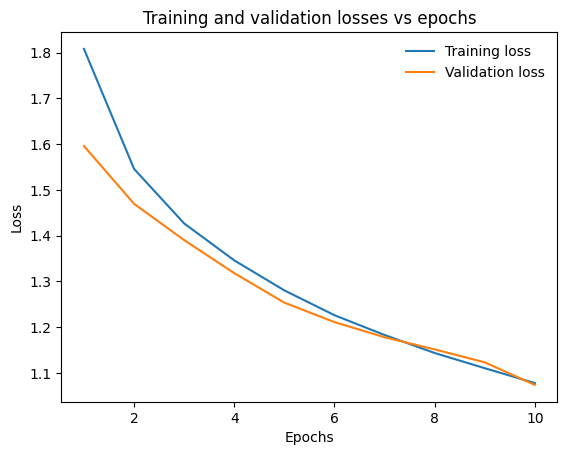

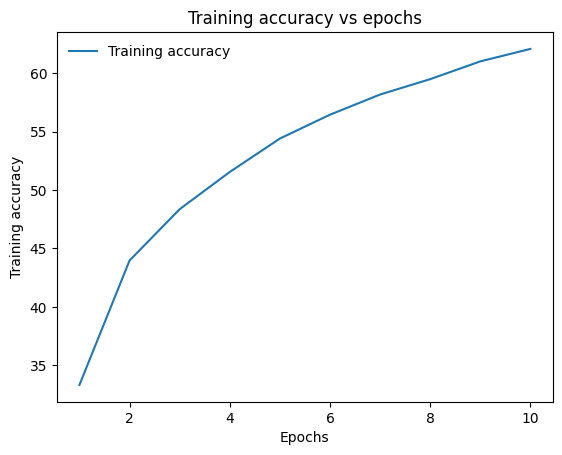

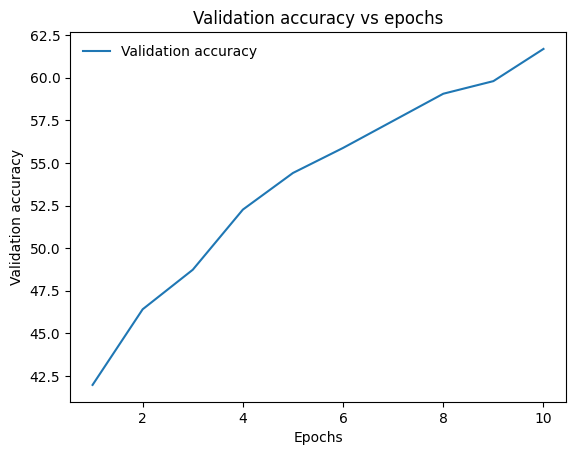

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f42d63ef040>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f42d63ef040>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Accuracy for class: plane is 67.3 %
Accuracy for class: car   is 73.4 %
Accuracy for class: bird  is 45.2 %
Accuracy for class: cat   is 45.5 %
Accuracy for class: deer  is 55.7 %
Accuracy for class: dog   is 47.3 %
Accuracy for class: frog  is 73.3 %
Accuracy for class: horse is 69.0 %
Accuracy for class: ship  is 67.1 %
Accuracy for class: truck is 73.1 %
Model with learning rate:  0.0001  epochs:  10  batch size:  32  optimizer:  sgd  data augmentation:  True  loss function:  cross_entropy  learning rate scheduler:  False
Files already downloaded and verified
Files already downloaded and verified


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f42d63ef040>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f42d63ef040>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Epoch 1 train loss: 2.304 val loss: 2.302 train accuracy: 11.040 val accuracy: 11.910


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f42d63ef040>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f42d63ef040>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Epoch 2 train loss: 2.300 val loss: 2.297 train accuracy: 12.108 val accuracy: 11.640


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f42d63ef040>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f42d63ef040>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Epoch 3 train loss: 2.292 val loss: 2.284 train accuracy: 13.148 val accuracy: 15.800


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f42d63ef040>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f42d63ef040>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Epoch 4 train loss: 2.271 val loss: 2.251 train accuracy: 16.670 val accuracy: 16.510


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f42d63ef040>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f42d63ef040>can only test a child process

Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Epoch 5 train loss: 2.232 val loss: 2.207 train accuracy: 17.344 val accuracy: 18.130


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f42d63ef040>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f42d63ef040>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Epoch 6 train loss: 2.188 val loss: 2.159 train accuracy: 19.294 val accuracy: 20.500


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f42d63ef040>
Exception ignored in: Traceback (most recent call last):
<function _MultiProcessingDataLoaderIter.__del__ at 0x7f42d63ef040>  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()

  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
    Traceback (most recent call last):
if w.is_alive():  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__

      File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
    self._shutdown_workers()assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError
:   File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
can only test a child process
    if w.is_alive():
  File "/usr/lib/pytho

Epoch 7 train loss: 2.133 val loss: 2.092 train accuracy: 21.014 val accuracy: 23.730


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f42d63ef040>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f42d63ef040>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Epoch 8 train loss: 2.056 val loss: 2.012 train accuracy: 25.004 val accuracy: 27.200


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f42d63ef040>
Exception ignored in: Traceback (most recent call last):
<function _MultiProcessingDataLoaderIter.__del__ at 0x7f42d63ef040>  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__

    self._shutdown_workers()
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
    if w.is_alive():    
self._shutdown_workers()  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive

  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
        assert self._parent_pid == os.getpid(), 'can only test a child process'if w.is_alive():

AssertionError  File "/usr/lib/python3.9/multiprocessing/process.py"

Epoch 9 train loss: 1.983 val loss: 1.943 train accuracy: 27.508 val accuracy: 29.560


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f42d63ef040>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child processException ignored in: 
<function _MultiProcessingDataLoaderIter.__del__ at 0x7f42d63ef040>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Epoch 10 train loss: 1.914 val loss: 1.877 train accuracy: 30.086 val accuracy: 30.910
Finished Training


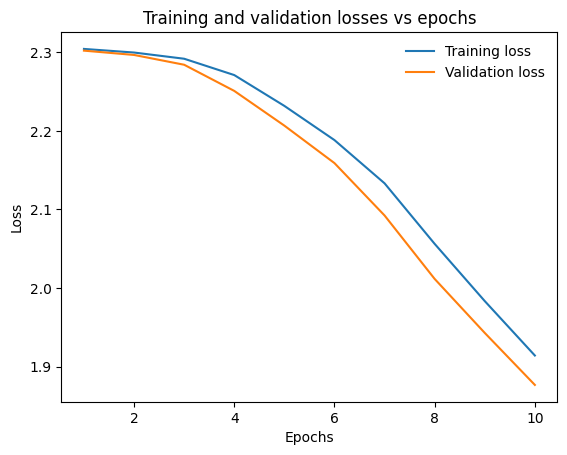

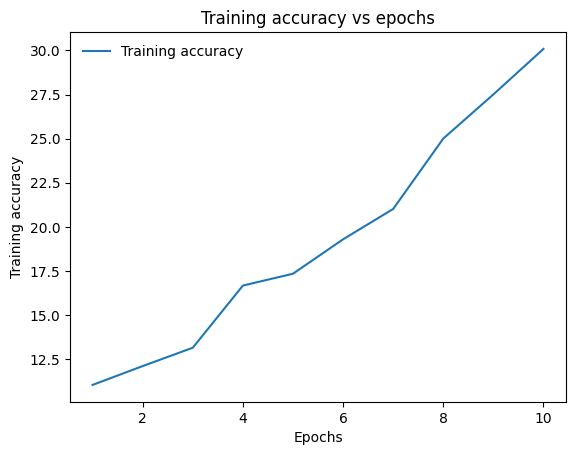

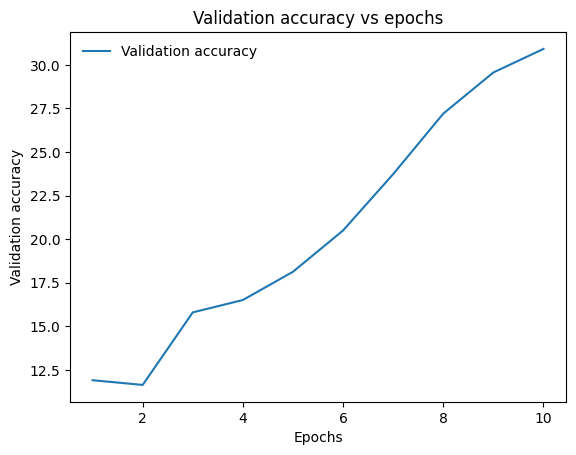

Accuracy for class: plane is 42.3 %
Accuracy for class: car   is 35.9 %
Accuracy for class: bird  is 0.2 %
Accuracy for class: cat   is 8.9 %
Accuracy for class: deer  is 2.4 %
Accuracy for class: dog   is 30.0 %
Accuracy for class: frog  is 71.7 %
Accuracy for class: horse is 44.7 %
Accuracy for class: ship  is 25.9 %
Accuracy for class: truck is 47.1 %
Model with learning rate:  0.001  epochs:  10  batch size:  32  optimizer:  adam  data augmentation:  True  loss function:  cross_entropy  learning rate scheduler:  False
Files already downloaded and verified
Files already downloaded and verified
Epoch 1 train loss: 1.527 val loss: 1.270 train accuracy: 43.634 val accuracy: 54.620
Epoch 2 train loss: 1.175 val loss: 1.097 train accuracy: 57.930 val accuracy: 60.620
Epoch 3 train loss: 1.016 val loss: 1.000 train accuracy: 63.990 val accuracy: 64.570
Epoch 4 train loss: 0.910 val loss: 0.965 train accuracy: 67.716 val accuracy: 65.950
Epoch 5 train loss: 0.835 val loss: 0.941 train accu

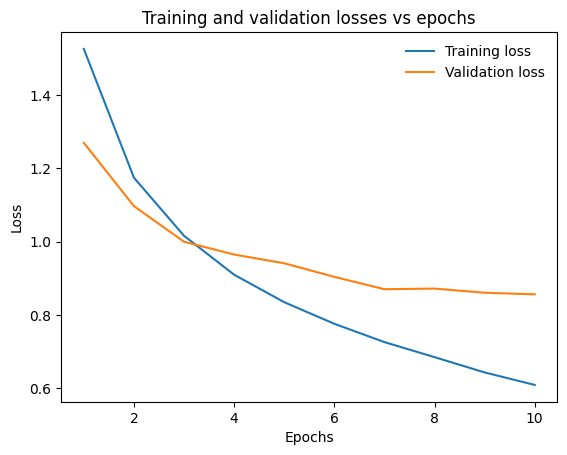

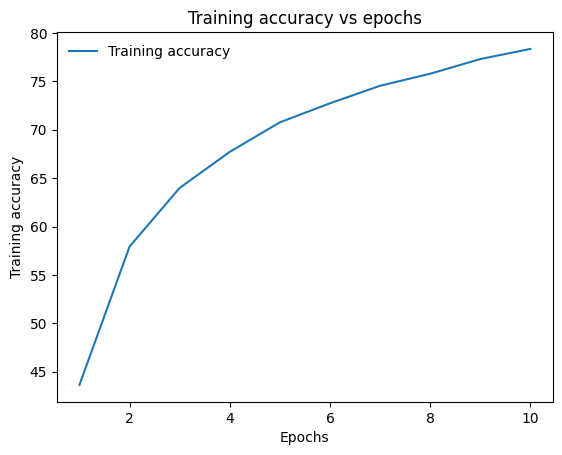

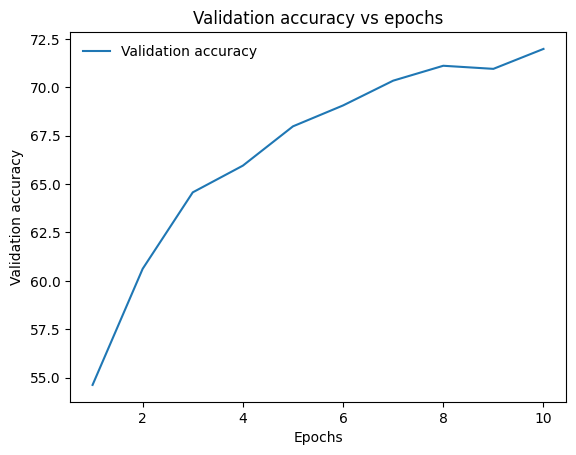

Accuracy for class: plane is 76.5 %
Accuracy for class: car   is 79.6 %
Accuracy for class: bird  is 58.4 %
Accuracy for class: cat   is 61.7 %
Accuracy for class: deer  is 74.2 %
Accuracy for class: dog   is 58.0 %
Accuracy for class: frog  is 77.8 %
Accuracy for class: horse is 74.1 %
Accuracy for class: ship  is 78.3 %
Accuracy for class: truck is 81.2 %
Model with learning rate:  0.001  epochs:  10  batch size:  32  optimizer:  sgd  data augmentation:  True  loss function:  cross_entropy  learning rate scheduler:  False
Files already downloaded and verified
Files already downloaded and verified
Epoch 1 train loss: 2.088 val loss: 1.821 train accuracy: 22.650 val accuracy: 32.250
Epoch 2 train loss: 1.653 val loss: 1.531 train accuracy: 38.910 val accuracy: 43.740
Epoch 3 train loss: 1.461 val loss: 1.371 train accuracy: 46.512 val accuracy: 50.130
Epoch 4 train loss: 1.337 val loss: 1.262 train accuracy: 51.560 val accuracy: 54.810
Epoch 5 train loss: 1.240 val loss: 1.184 train ac

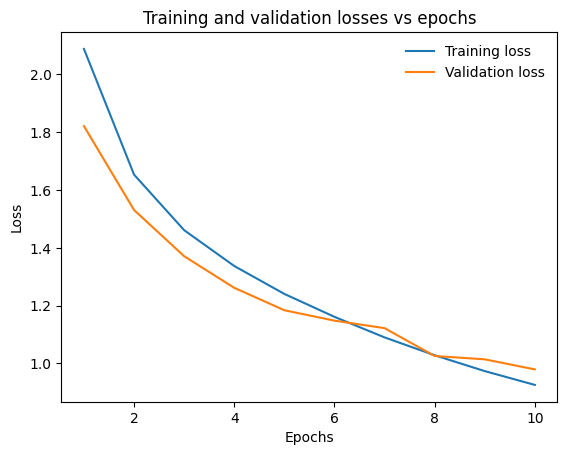

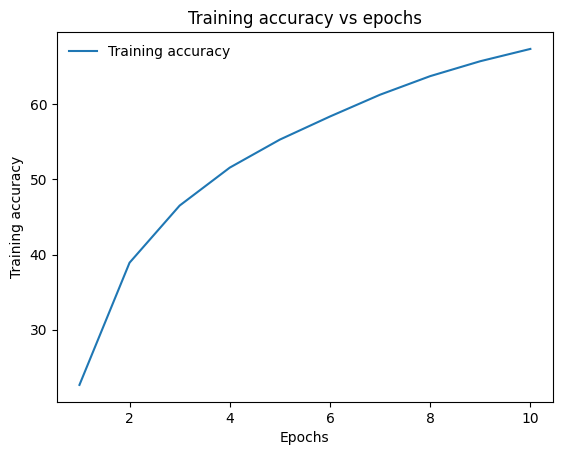

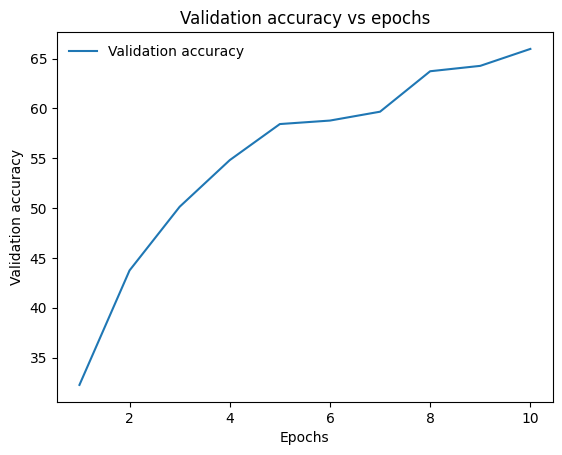

Accuracy for class: plane is 79.1 %
Accuracy for class: car   is 87.4 %
Accuracy for class: bird  is 43.4 %
Accuracy for class: cat   is 53.1 %
Accuracy for class: deer  is 50.6 %
Accuracy for class: dog   is 59.6 %
Accuracy for class: frog  is 76.1 %
Accuracy for class: horse is 72.8 %
Accuracy for class: ship  is 73.6 %
Accuracy for class: truck is 64.0 %
Model with learning rate:  0.01  epochs:  10  batch size:  32  optimizer:  adam  data augmentation:  True  loss function:  cross_entropy  learning rate scheduler:  False
Files already downloaded and verified
Files already downloaded and verified
Epoch 1 train loss: 2.305 val loss: 2.304 train accuracy: 9.976 val accuracy: 10.000
Epoch 2 train loss: 2.304 val loss: 2.304 train accuracy: 9.982 val accuracy: 10.000
Epoch 3 train loss: 2.304 val loss: 2.304 train accuracy: 9.880 val accuracy: 10.000
Epoch 4 train loss: 2.304 val loss: 2.303 train accuracy: 9.790 val accuracy: 10.000
Epoch 5 train loss: 2.304 val loss: 2.303 train accura

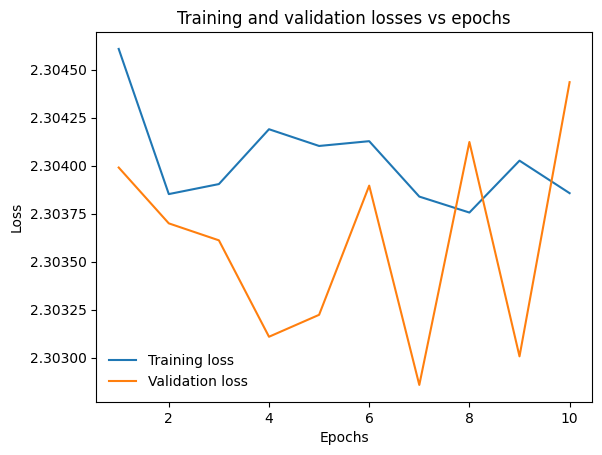

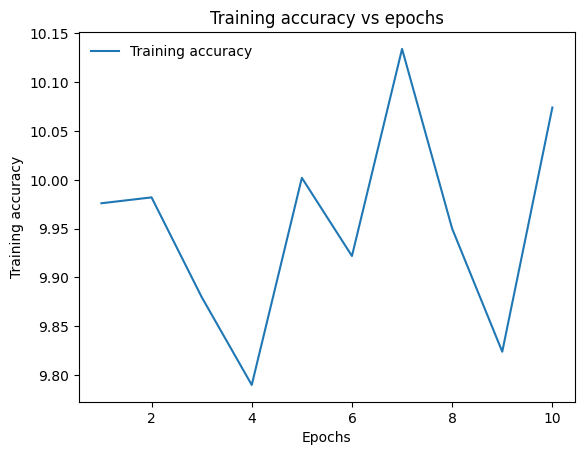

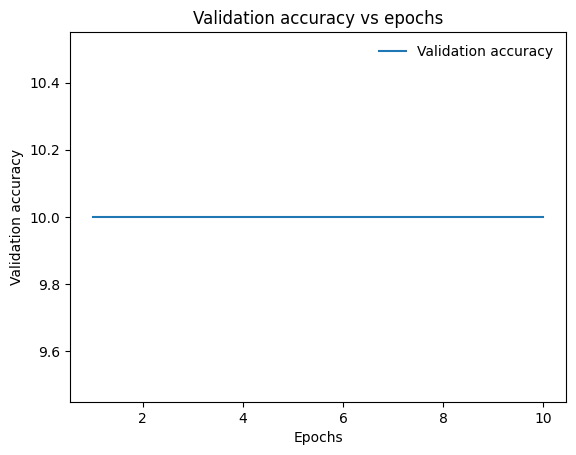

Accuracy for class: plane is 0.0 %
Accuracy for class: car   is 0.0 %
Accuracy for class: bird  is 0.0 %
Accuracy for class: cat   is 0.0 %
Accuracy for class: deer  is 100.0 %
Accuracy for class: dog   is 0.0 %
Accuracy for class: frog  is 0.0 %
Accuracy for class: horse is 0.0 %
Accuracy for class: ship  is 0.0 %
Accuracy for class: truck is 0.0 %
Model with learning rate:  0.01  epochs:  10  batch size:  32  optimizer:  sgd  data augmentation:  True  loss function:  cross_entropy  learning rate scheduler:  False
Files already downloaded and verified
Files already downloaded and verified
Epoch 1 train loss: 1.631 val loss: 1.403 train accuracy: 39.764 val accuracy: 48.540
Epoch 2 train loss: 1.160 val loss: 1.047 train accuracy: 58.474 val accuracy: 62.340
Epoch 3 train loss: 0.971 val loss: 0.974 train accuracy: 65.798 val accuracy: 66.480
Epoch 4 train loss: 0.848 val loss: 0.939 train accuracy: 70.244 val accuracy: 68.390
Epoch 5 train loss: 0.769 val loss: 0.862 train accuracy: 7

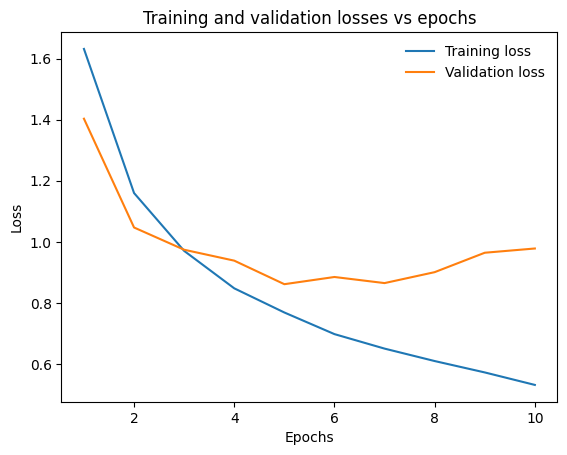

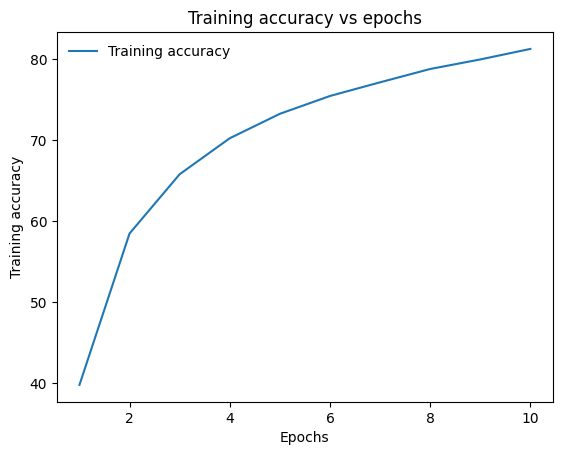

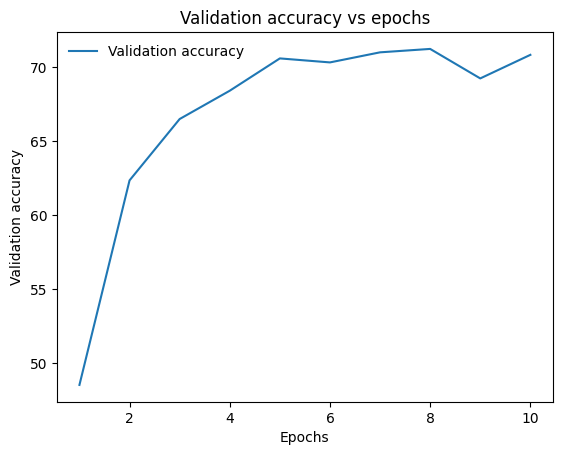

Accuracy for class: plane is 73.9 %
Accuracy for class: car   is 87.9 %
Accuracy for class: bird  is 55.8 %
Accuracy for class: cat   is 48.2 %
Accuracy for class: deer  is 64.2 %
Accuracy for class: dog   is 57.0 %
Accuracy for class: frog  is 84.5 %
Accuracy for class: horse is 72.4 %
Accuracy for class: ship  is 82.3 %
Accuracy for class: truck is 81.9 %


70.81

In [11]:


model_testing(0.0001, 10, 32,'adam')
model_testing(0.0001, 10, 32,'sgd')
model_testing(0.001, 10, 32,'adam')
model_testing(0.001, 10, 32,'sgd')
model_testing(0.01, 10, 32, 'adam')
model_testing(0.01, 10, 32, 'sgd')



###2) Variation in LR (using scheduler)


Model with learning rate:  0.001  epochs:  10  batch size:  32  optimizer:  adam  data augmentation:  True  loss function:  cross_entropy  learning rate scheduler:  True
Files already downloaded and verified
Files already downloaded and verified
Epoch 1 train loss: 1.502 val loss: 1.307 train accuracy: 44.826 val accuracy: 53.550
Epoch 2 train loss: 1.113 val loss: 1.070 train accuracy: 60.162 val accuracy: 61.340
Epoch 3 train loss: 0.979 val loss: 1.026 train accuracy: 65.032 val accuracy: 63.300
Epoch 4 train loss: 0.914 val loss: 0.976 train accuracy: 67.474 val accuracy: 65.290
Epoch 5 train loss: 0.881 val loss: 0.954 train accuracy: 68.878 val accuracy: 66.210
Epoch 6 train loss: 0.864 val loss: 0.948 train accuracy: 69.398 val accuracy: 66.600
Epoch 7 train loss: 0.856 val loss: 0.945 train accuracy: 69.734 val accuracy: 66.570
Epoch 8 train loss: 0.852 val loss: 0.943 train accuracy: 69.970 val accuracy: 66.560
Epoch 9 train loss: 0.850 val loss: 0.943 train accuracy: 70.004 v

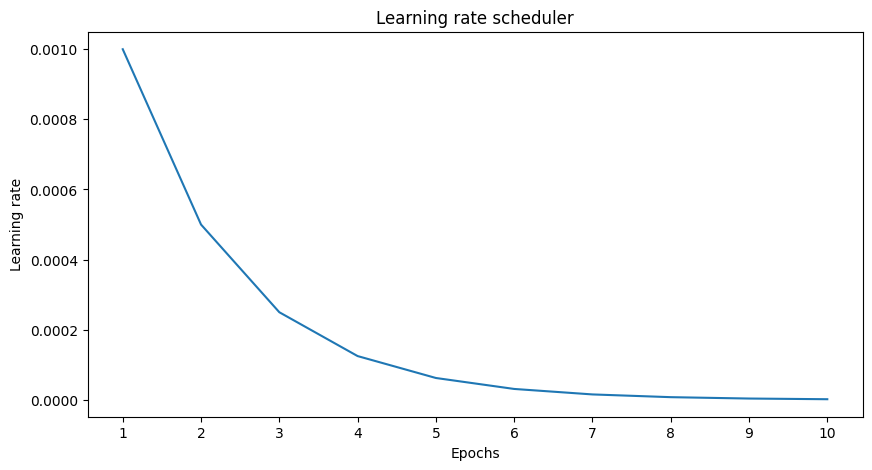

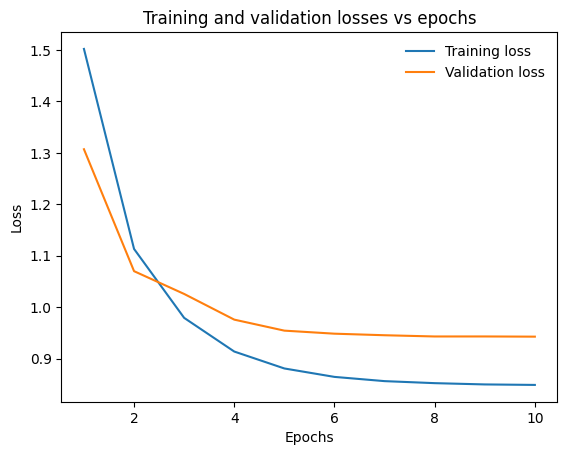

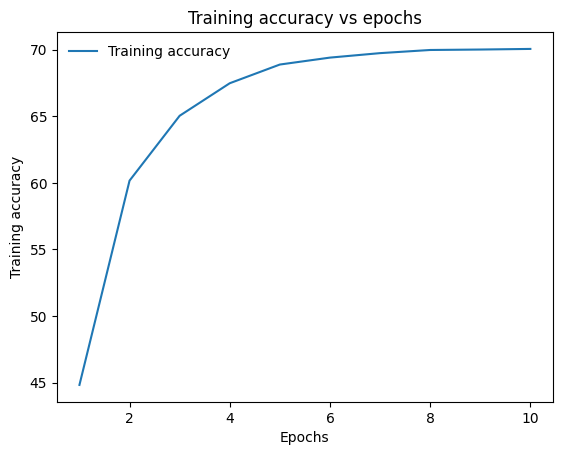

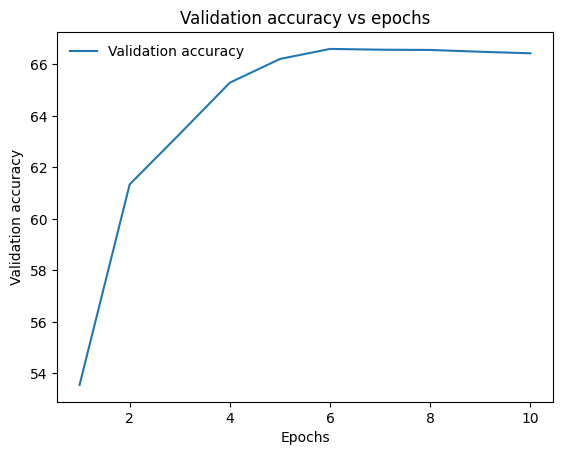

Accuracy for class: plane is 69.7 %
Accuracy for class: car   is 80.5 %
Accuracy for class: bird  is 51.8 %
Accuracy for class: cat   is 44.7 %
Accuracy for class: deer  is 59.0 %
Accuracy for class: dog   is 55.4 %
Accuracy for class: frog  is 78.4 %
Accuracy for class: horse is 72.0 %
Accuracy for class: ship  is 76.6 %
Accuracy for class: truck is 76.2 %
Model with learning rate:  0.001  epochs:  10  batch size:  32  optimizer:  sgd  data augmentation:  True  loss function:  cross_entropy  learning rate scheduler:  True
Files already downloaded and verified
Files already downloaded and verified
Epoch 1 train loss: 2.080 val loss: 1.801 train accuracy: 22.718 val accuracy: 33.040
Epoch 2 train loss: 1.711 val loss: 1.616 train accuracy: 36.950 val accuracy: 39.940
Epoch 3 train loss: 1.592 val loss: 1.551 train accuracy: 41.326 val accuracy: 42.930
Epoch 4 train loss: 1.539 val loss: 1.523 train accuracy: 43.622 val accuracy: 43.610
Epoch 5 train loss: 1.515 val loss: 1.510 train acc

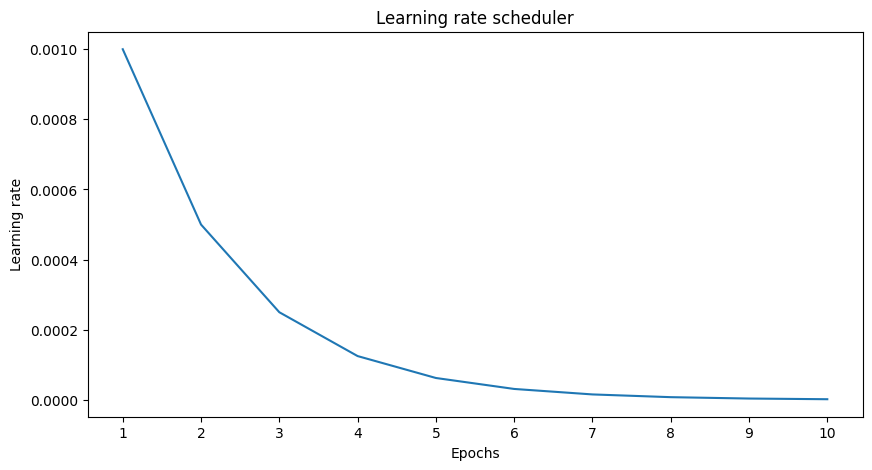

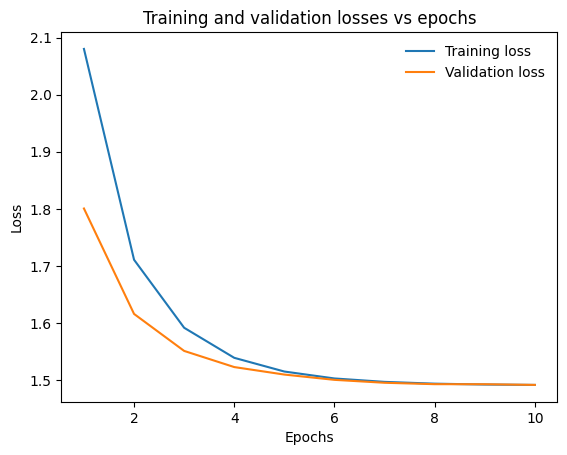

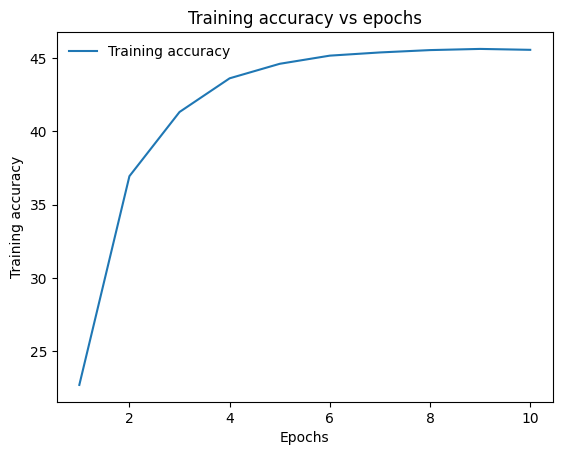

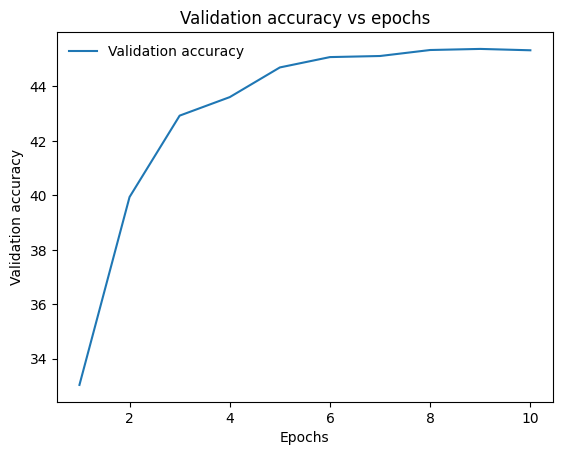

Accuracy for class: plane is 52.2 %
Accuracy for class: car   is 60.6 %
Accuracy for class: bird  is 19.7 %
Accuracy for class: cat   is 25.7 %
Accuracy for class: deer  is 37.4 %
Accuracy for class: dog   is 42.7 %
Accuracy for class: frog  is 64.7 %
Accuracy for class: horse is 54.2 %
Accuracy for class: ship  is 44.6 %
Accuracy for class: truck is 51.5 %


45.33

In [10]:


model_testing(0.001, 10, 32,'adam', 'cross_entropy', True, True)
model_testing(0.001, 10, 32,'sgd', 'cross_entropy', True, True)


### 3) Epochs

Model with learning rate:  0.001  epochs:  30  batch size:  32  optimizer:  sgd  data augmentation:  True  loss function:  cross_entropy  learning rate scheduler:  False


100%|██████████| 170498071/170498071 [00:03<00:00, 52799069.98it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Epoch 1 train loss: 2.119 val loss: 1.845 train accuracy: 21.182 val accuracy: 31.980
Epoch 2 train loss: 1.696 val loss: 1.564 train accuracy: 37.312 val accuracy: 42.050
Epoch 3 train loss: 1.500 val loss: 1.408 train accuracy: 44.996 val accuracy: 48.920
Epoch 4 train loss: 1.372 val loss: 1.312 train accuracy: 50.004 val accuracy: 51.930
Epoch 5 train loss: 1.263 val loss: 1.235 train accuracy: 54.754 val accuracy: 55.700
Epoch 6 train loss: 1.178 val loss: 1.156 train accuracy: 58.198 val accuracy: 58.630
Epoch 7 train loss: 1.106 val loss: 1.087 train accuracy: 60.998 val accuracy: 60.920
Epoch 8 train loss: 1.042 val loss: 1.053 train accuracy: 63.244 val accuracy: 62.640
Epoch 9 train loss: 0.990 val loss: 1.005 train accuracy: 65.054 val accuracy: 64.150
Epoch 10 train loss: 0.940 val loss: 1.076 train accuracy: 66.948 val accuracy: 62.890
Epoch 11 train loss: 0.903 val loss: 0.926 train a

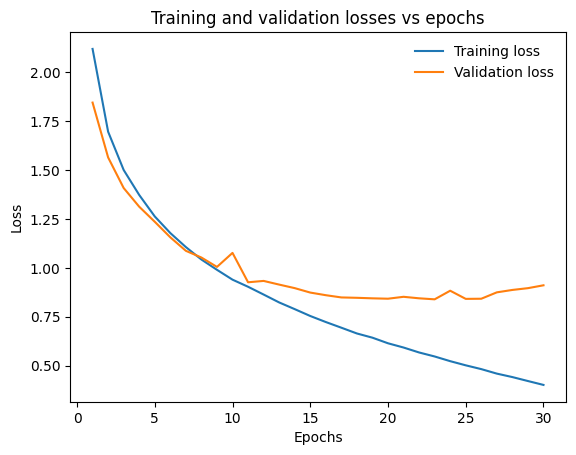

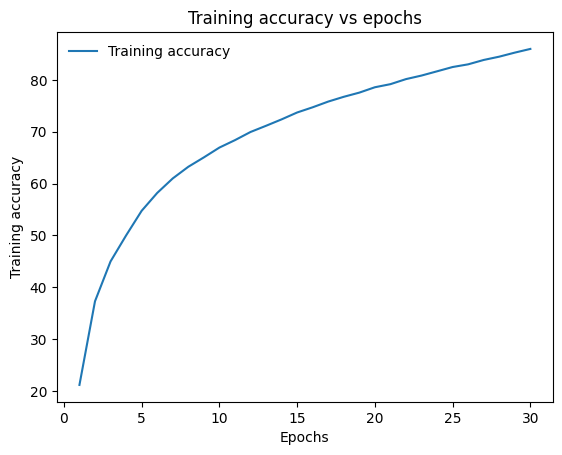

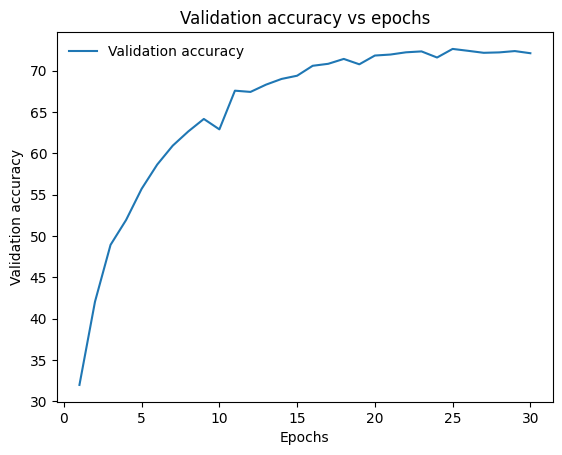

Accuracy for class: plane is 76.3 %
Accuracy for class: car   is 81.4 %
Accuracy for class: bird  is 62.9 %
Accuracy for class: cat   is 55.3 %
Accuracy for class: deer  is 71.6 %
Accuracy for class: dog   is 59.6 %
Accuracy for class: frog  is 74.9 %
Accuracy for class: horse is 79.6 %
Accuracy for class: ship  is 81.6 %
Accuracy for class: truck is 77.8 %


72.1

In [ ]:




# model_testing(0.001, 10, 32, 'adam')
# model_testing(0.001, 10, 32, 'sgd')
# model_testing(0.001, 30, 32, 'adam')
model_testing(0.001, 30, 32, 'sgd')


### 4) Batch size

Model with learning rate:  0.001  epochs:  10  batch size:  4  optimizer:  adam  data augmentation:  True  loss function:  cross_entropy  learning rate scheduler:  False
Files already downloaded and verified
Files already downloaded and verified
Epoch 1 train loss: 1.520 val loss: 1.333 train accuracy: 43.920 val accuracy: 52.130
Epoch 2 train loss: 1.230 val loss: 1.246 train accuracy: 55.834 val accuracy: 56.550
Epoch 3 train loss: 1.134 val loss: 1.216 train accuracy: 59.860 val accuracy: 57.940
Epoch 4 train loss: 1.069 val loss: 1.101 train accuracy: 62.216 val accuracy: 61.830
Epoch 5 train loss: 1.018 val loss: 1.083 train accuracy: 64.124 val accuracy: 62.320
Epoch 6 train loss: 0.982 val loss: 1.064 train accuracy: 65.532 val accuracy: 63.830
Epoch 7 train loss: 0.947 val loss: 1.068 train accuracy: 66.840 val accuracy: 64.010
Epoch 8 train loss: 0.921 val loss: 1.035 train accuracy: 67.620 val accuracy: 65.010
Epoch 9 train loss: 0.894 val loss: 1.032 train accuracy: 68.802 v

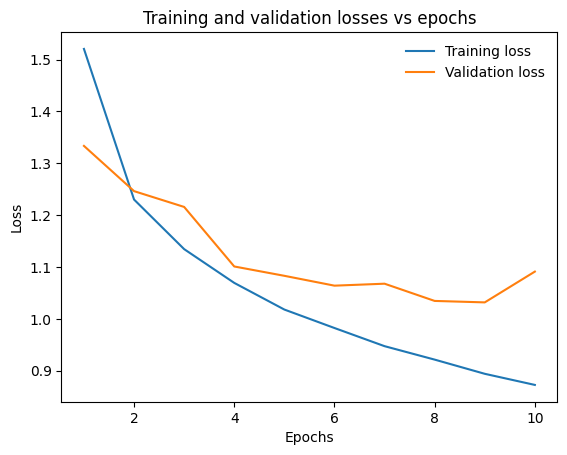

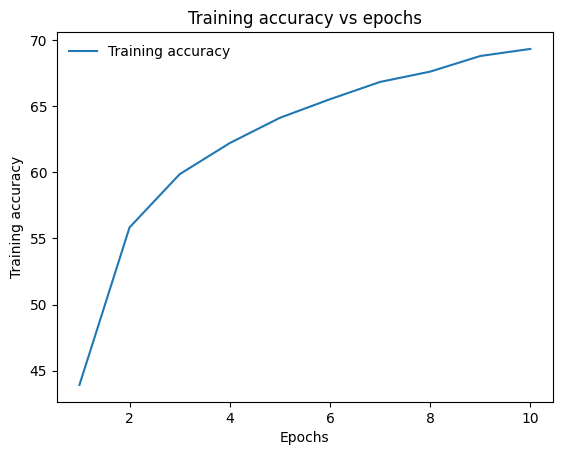

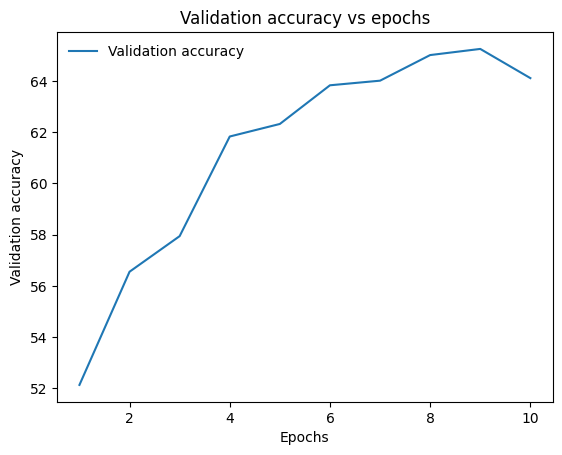

Accuracy for class: plane is 54.8 %
Accuracy for class: car   is 86.4 %
Accuracy for class: bird  is 39.9 %
Accuracy for class: cat   is 55.0 %
Accuracy for class: deer  is 54.2 %
Accuracy for class: dog   is 47.7 %
Accuracy for class: frog  is 79.4 %
Accuracy for class: horse is 72.7 %
Accuracy for class: ship  is 78.3 %
Accuracy for class: truck is 72.7 %
Model with learning rate:  0.001  epochs:  10  batch size:  8  optimizer:  adam  data augmentation:  True  loss function:  cross_entropy  learning rate scheduler:  False
Files already downloaded and verified
Files already downloaded and verified
Epoch 1 train loss: 1.428 val loss: 1.203 train accuracy: 47.742 val accuracy: 56.930
Epoch 2 train loss: 1.094 val loss: 1.087 train accuracy: 61.122 val accuracy: 61.680
Epoch 3 train loss: 0.954 val loss: 0.951 train accuracy: 66.240 val accuracy: 67.200
Epoch 4 train loss: 0.862 val loss: 0.907 train accuracy: 69.856 val accuracy: 68.800
Epoch 5 train loss: 0.802 val loss: 0.949 train ac

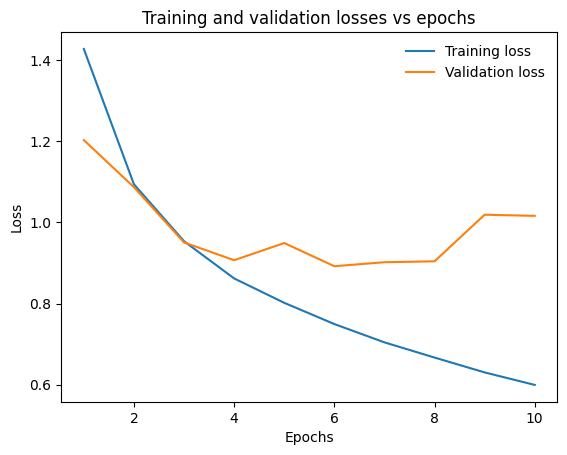

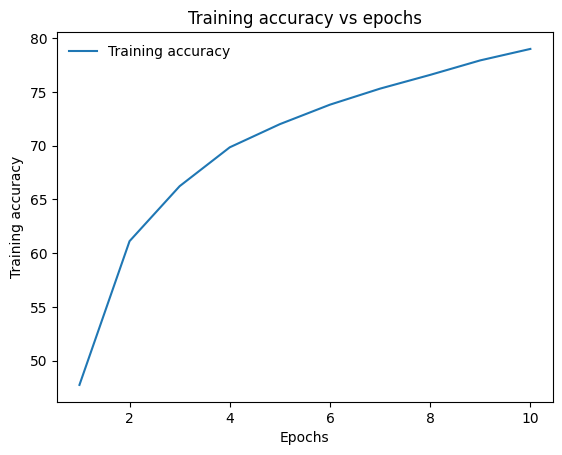

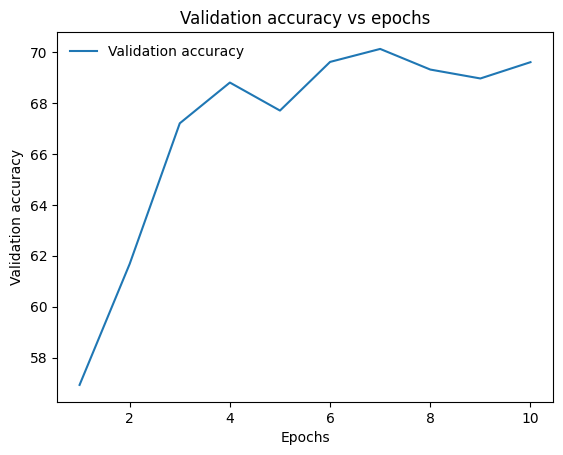

Accuracy for class: plane is 82.1 %
Accuracy for class: car   is 76.1 %
Accuracy for class: bird  is 50.5 %
Accuracy for class: cat   is 62.8 %
Accuracy for class: deer  is 70.7 %
Accuracy for class: dog   is 56.6 %
Accuracy for class: frog  is 74.9 %
Accuracy for class: horse is 70.2 %
Accuracy for class: ship  is 74.5 %
Accuracy for class: truck is 77.6 %
Model with learning rate:  0.001  epochs:  10  batch size:  16  optimizer:  adam  data augmentation:  True  loss function:  cross_entropy  learning rate scheduler:  False
Files already downloaded and verified
Files already downloaded and verified
Epoch 1 train loss: 1.502 val loss: 1.240 train accuracy: 44.718 val accuracy: 55.270
Epoch 2 train loss: 1.155 val loss: 1.100 train accuracy: 58.890 val accuracy: 61.690
Epoch 3 train loss: 1.017 val loss: 0.998 train accuracy: 64.092 val accuracy: 64.740
Epoch 4 train loss: 0.934 val loss: 0.960 train accuracy: 67.052 val accuracy: 66.120
Epoch 5 train loss: 0.873 val loss: 1.003 train a

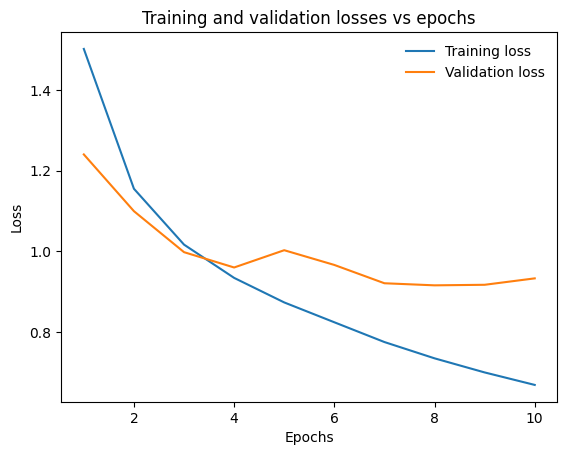

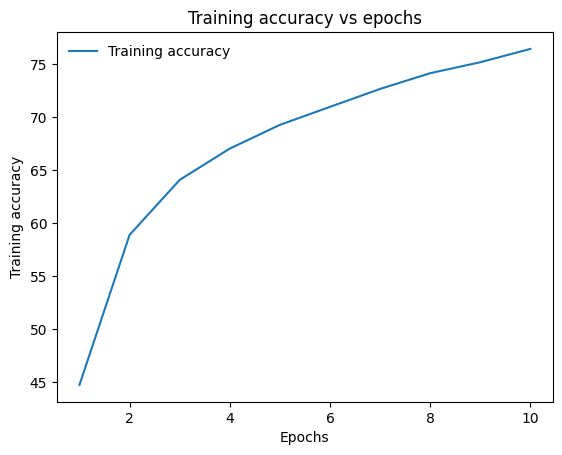

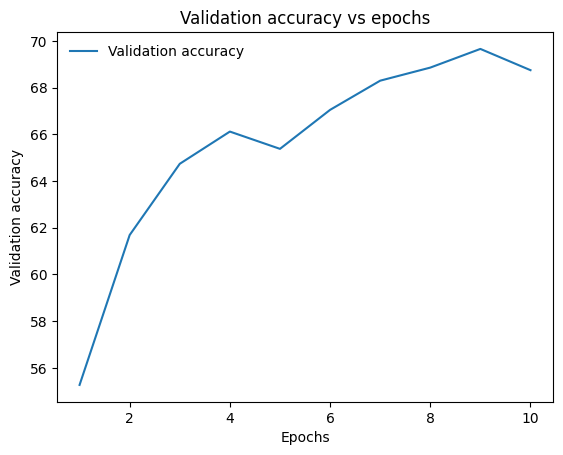

Accuracy for class: plane is 68.4 %
Accuracy for class: car   is 81.6 %
Accuracy for class: bird  is 60.7 %
Accuracy for class: cat   is 64.3 %
Accuracy for class: deer  is 58.0 %
Accuracy for class: dog   is 52.4 %
Accuracy for class: frog  is 73.1 %
Accuracy for class: horse is 75.0 %
Accuracy for class: ship  is 75.7 %
Accuracy for class: truck is 78.3 %
Model with learning rate:  0.001  epochs:  10  batch size:  32  optimizer:  adam  data augmentation:  True  loss function:  cross_entropy  learning rate scheduler:  False
Files already downloaded and verified
Files already downloaded and verified
Epoch 1 train loss: 1.522 val loss: 1.233 train accuracy: 44.038 val accuracy: 55.890
Epoch 2 train loss: 1.156 val loss: 1.086 train accuracy: 58.726 val accuracy: 61.280
Epoch 3 train loss: 0.998 val loss: 1.008 train accuracy: 64.744 val accuracy: 64.180
Epoch 4 train loss: 0.886 val loss: 0.918 train accuracy: 68.792 val accuracy: 67.710
Epoch 5 train loss: 0.806 val loss: 0.937 train a

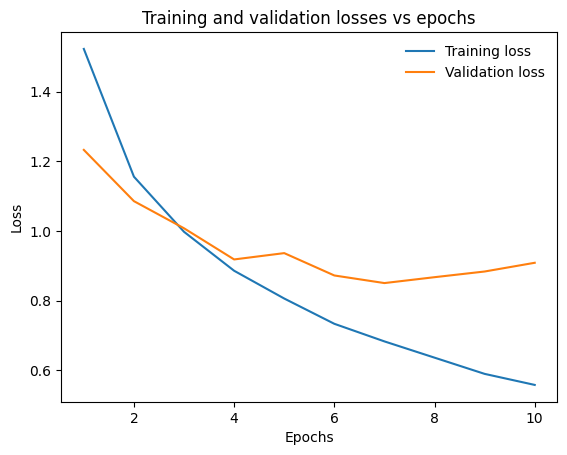

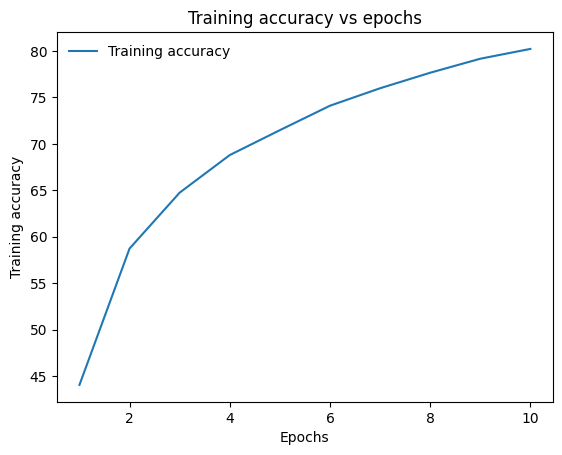

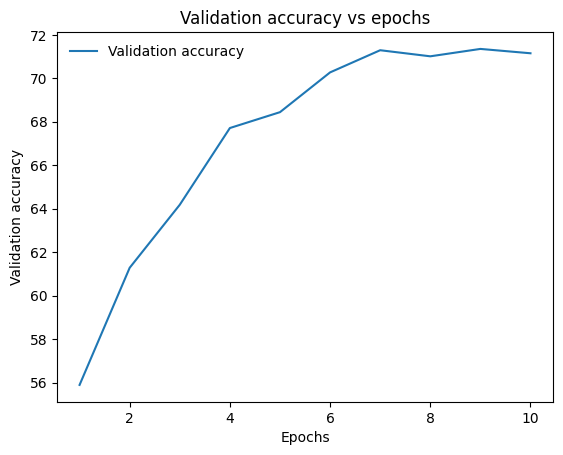

Accuracy for class: plane is 77.1 %
Accuracy for class: car   is 80.4 %
Accuracy for class: bird  is 70.5 %
Accuracy for class: cat   is 47.7 %
Accuracy for class: deer  is 64.7 %
Accuracy for class: dog   is 54.7 %
Accuracy for class: frog  is 85.7 %
Accuracy for class: horse is 70.6 %
Accuracy for class: ship  is 78.4 %
Accuracy for class: truck is 81.7 %


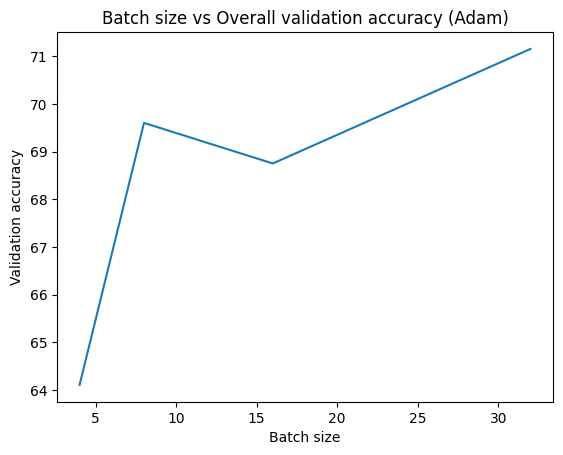

In [7]:



# Vary the batch size {4, 8, 16, 32} and plot the batch-size vs. overall validation accuracy curves.

val_accuracies = []
batch_sizes = [4, 8, 16, 32]
for batch_size in batch_sizes:
    val_accuracy = model_testing(0.001, 10, batch_size, 'adam')
    val_accuracies.append(val_accuracy)

plt.plot(batch_sizes, val_accuracies)
plt.title('Batch size vs Overall validation accuracy (Adam)')
plt.xlabel('Batch size')
plt.ylabel('Validation accuracy')
plt.show()

# val_accuracies = []
# batch_sizes = [4, 8, 16, 32]
# for batch_size in batch_sizes:
#     val_accuracy = model_testing(0.001, 10, batch_size, 'sgd')
#     val_accuracies.append(val_accuracy)

# plt.plot(batch_sizes, val_accuracies)
# plt.title('Batch size vs Overall validation accuracy (SGD)')
# plt.xlabel('Batch size')
# plt.ylabel('Validation accuracy')
# plt.show()



## 4.2) Effect of Loss Function 

Model with learning rate:  0.001  epochs:  10  batch size:  32  optimizer:  adam  data augmentation:  True  loss function:  cross_entropy  learning rate scheduler:  False
Files already downloaded and verified
Files already downloaded and verified
Epoch 1 train loss: 1.543 val loss: 1.326 train accuracy: 43.254 val accuracy: 52.480
Epoch 2 train loss: 1.190 val loss: 1.117 train accuracy: 57.408 val accuracy: 60.410
Epoch 3 train loss: 1.043 val loss: 1.048 train accuracy: 63.006 val accuracy: 62.860
Epoch 4 train loss: 0.945 val loss: 1.024 train accuracy: 66.622 val accuracy: 64.350
Epoch 5 train loss: 0.867 val loss: 0.928 train accuracy: 69.610 val accuracy: 67.600
Epoch 6 train loss: 0.803 val loss: 0.918 train accuracy: 71.774 val accuracy: 67.980
Epoch 7 train loss: 0.751 val loss: 0.889 train accuracy: 73.410 val accuracy: 69.540
Epoch 8 train loss: 0.709 val loss: 0.897 train accuracy: 74.864 val accuracy: 69.140
Epoch 9 train loss: 0.672 val loss: 0.865 train accuracy: 76.068 

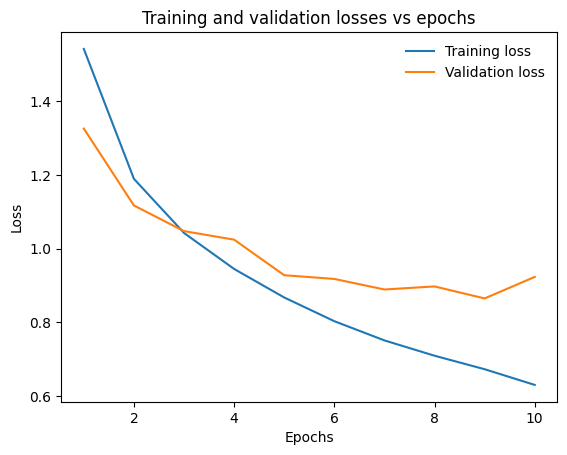

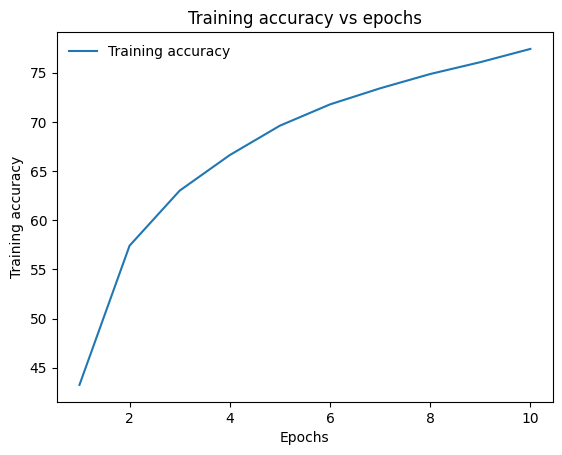

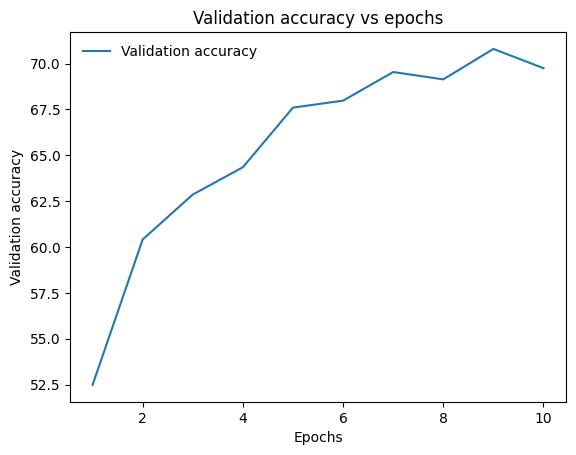

Accuracy for class: plane is 65.7 %
Accuracy for class: car   is 82.1 %
Accuracy for class: bird  is 45.4 %
Accuracy for class: cat   is 59.0 %
Accuracy for class: deer  is 68.7 %
Accuracy for class: dog   is 65.7 %
Accuracy for class: frog  is 80.1 %
Accuracy for class: horse is 69.3 %
Accuracy for class: ship  is 89.9 %
Accuracy for class: truck is 71.6 %
Model with learning rate:  0.001  epochs:  10  batch size:  32  optimizer:  adam  data augmentation:  True  loss function:  kl_divergence  learning rate scheduler:  False
Files already downloaded and verified
Files already downloaded and verified
Epoch 1 train loss: -0.000 val loss: -0.000 train accuracy: 10.000 val accuracy: 10.000
Epoch 2 train loss: 0.000 val loss: -0.000 train accuracy: 10.000 val accuracy: 10.000
Epoch 3 train loss: 0.000 val loss: 0.000 train accuracy: 10.000 val accuracy: 10.000
Epoch 4 train loss: 0.000 val loss: 0.000 train accuracy: 10.096 val accuracy: 10.160
Epoch 5 train loss: 0.000 val loss: 0.000 trai

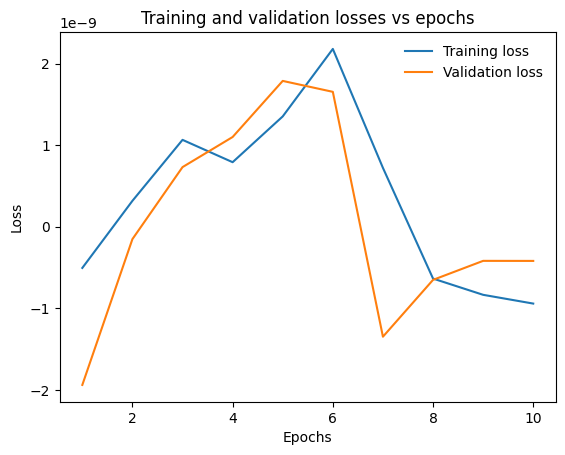

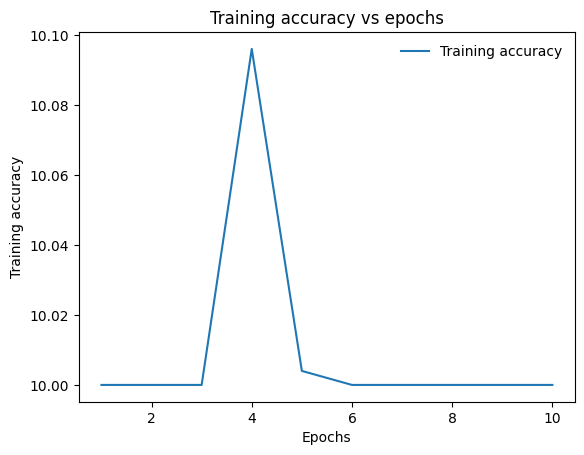

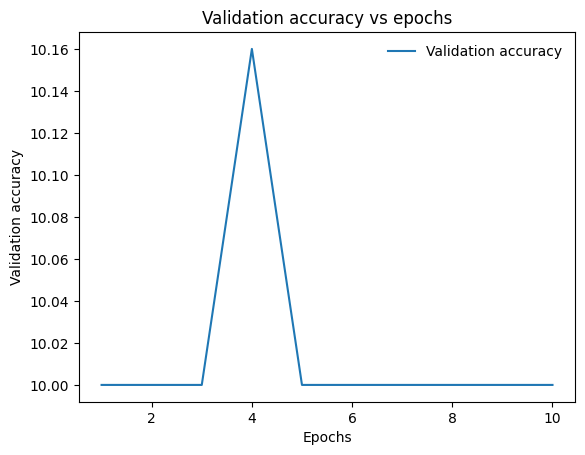

Accuracy for class: plane is 0.0 %
Accuracy for class: car   is 0.0 %
Accuracy for class: bird  is 0.0 %
Accuracy for class: cat   is 0.0 %
Accuracy for class: deer  is 0.0 %
Accuracy for class: dog   is 0.0 %
Accuracy for class: frog  is 0.0 %
Accuracy for class: horse is 0.0 %
Accuracy for class: ship  is 0.0 %
Accuracy for class: truck is 100.0 %


10.0

In [6]:




model_testing(0.001, 10, 32, 'adam', 'cross_entropy')
# model_testing(0.001, 10, 32, 'sgd', 'cross_entropy')

model_testing(0.001, 10, 32, 'adam', 'kl_divergence')
# model_testing(0.001, 10, 32, 'sgd', 'kl_divergence')






## 4.3)  Effect of Data Augmentation

Model with learning rate:  0.001  epochs:  10  batch size:  32  optimizer:  adam  data augmentation:  False  loss function:  cross_entropy  learning rate scheduler:  False
Files already downloaded and verified
Files already downloaded and verified
Epoch 1 train loss: 1.686 val loss: 1.421 train accuracy: 37.210 val accuracy: 48.950
Epoch 2 train loss: 1.346 val loss: 1.296 train accuracy: 51.010 val accuracy: 52.870
Epoch 3 train loss: 1.225 val loss: 1.188 train accuracy: 56.028 val accuracy: 57.570
Epoch 4 train loss: 1.137 val loss: 1.122 train accuracy: 59.408 val accuracy: 60.390
Epoch 5 train loss: 1.057 val loss: 1.070 train accuracy: 62.586 val accuracy: 62.070
Epoch 6 train loss: 1.005 val loss: 1.014 train accuracy: 64.252 val accuracy: 63.930
Epoch 7 train loss: 0.951 val loss: 0.985 train accuracy: 66.388 val accuracy: 65.630
Epoch 8 train loss: 0.915 val loss: 0.966 train accuracy: 67.540 val accuracy: 66.000
Epoch 9 train loss: 0.869 val loss: 0.985 train accuracy: 68.920

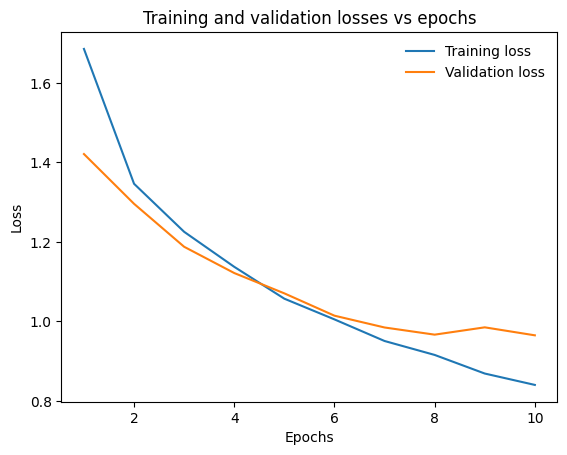

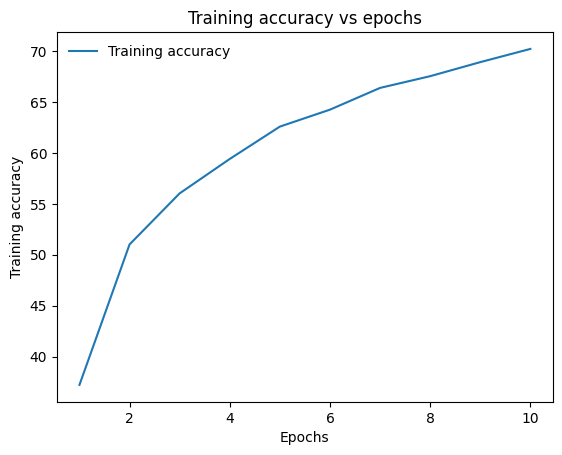

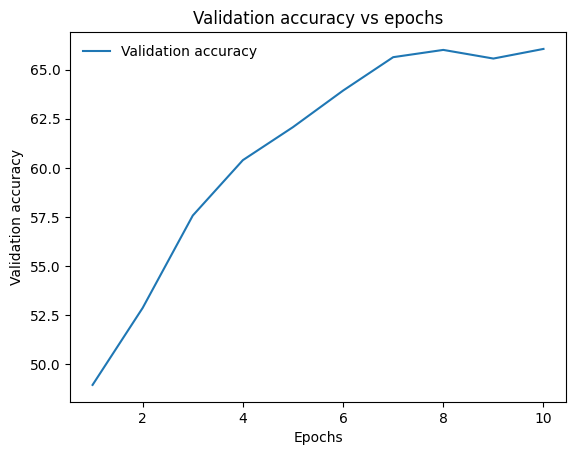

Accuracy for class: plane is 62.0 %
Accuracy for class: car   is 76.0 %
Accuracy for class: bird  is 50.7 %
Accuracy for class: cat   is 36.3 %
Accuracy for class: deer  is 71.9 %
Accuracy for class: dog   is 58.2 %
Accuracy for class: frog  is 78.8 %
Accuracy for class: horse is 69.0 %
Accuracy for class: ship  is 77.2 %
Accuracy for class: truck is 80.4 %


66.05

In [6]:




model_testing(0.001, 10, 32, 'adam', 'cross_entropy', False)
# model_testing(0.001, 10, 32, 'sgd', 'cross_entropy', False)






# 5) Improving the model

In [2]:
# Training on GPU

import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

# net.to(device)

# inputs, labels = data[0].to(device), data[1].to(device)





if device == 'cuda':
  usegpu = True
else:
  usegpu = False

# Load the cifar10 dataset

import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt









def model_testing(learning_rate, epochs, batch_size, opti = 'adam', loss_func = 'cross_entropy' , data_augmentation = True, lrscheduler = False):

    print("Model with learning rate: ", learning_rate, " epochs: ", epochs, " batch size: ", batch_size, " optimizer: ", opti, " data augmentation: ", data_augmentation, " loss function: ", loss_func, " learning rate scheduler: ", lrscheduler)

    # Data augmentation
    if data_augmentation == True:

        transform = transforms.Compose(
            [transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    else:
        transform = transforms.Compose(
            [transforms.ToTensor(),
            transforms.Normalize((1, 1, 1), (1, 1, 1))])
             



    # batch_size = 32

    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                            shuffle=True, num_workers=2)

    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                            shuffle=False, num_workers=2)

    classes = ('plane', 'car', 'bird', 'cat',
            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')




    # # Displaying some images from the dataset

    # import matplotlib.pyplot as plt
    # import numpy as np

    # # functions to show an image


    # def imshow(img):
    #     img = img / 2 + 0.5     # unnormalize
    #     npimg = img.numpy()
    #     plt.imshow(np.transpose(npimg, (1, 2, 0)))
    #     plt.show()


    # # get some random training images
    # dataiter = iter(trainloader)
    # images, labels = next(dataiter)

    # # show images
    # imshow(torchvision.utils.make_grid(images))
    # # print labels
    # print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))





    # Defining the CNN

    # CONV1: Kernel size (3 × 3), In channels 3, Out channels 32.
    # • POOL1: Kernel size (2 × 2).

    # • CONV2: Kernel size (5 × 5), In channels 32, Out channels 64.
    # • POOL2: Kernel size (2 × 2).
    # • CONV3: Kernel size (3 × 3), In channels 64, Out channels 64.
    # • FC1: Fully connected layer (also known as Linear layer) with 64 output neurons.
    # • FC2: Fully connected layer with 10 output neurons.

    import torch.nn as nn
    import torch.nn.functional as F


    class Net(nn.Module):
        def __init__(self):
            super().__init__()
            
            self.conv1 = nn.Conv2d(3, 32, 3)
            self.batchnorm1 = nn.BatchNorm2d(32)
            self.pool1 = nn.MaxPool2d(2, 2)
            self.conv2 = nn.Conv2d(32, 64, 5)
            self.batchnorm2 = nn.BatchNorm2d(64)
            self.pool2 = nn.MaxPool2d(2, 2)
            self.conv3 = nn.Conv2d(64, 64, 3)
            self.batchnorm3 = nn.BatchNorm2d(64)
            self.fc1 = nn.Linear(64*3*3, 64)
            self.fc2 = nn.Linear(64, 10)
            

        def forward(self, x):
            x = F.relu(self.batchnorm1(self.conv1(x)))
            x = self.pool1(x)
            x = F.relu(self.batchnorm2(self.conv2(x)))
            x = self.pool2(x)
            x = F.relu(self.batchnorm3(self.conv3(x)))

            # x = x.view(-1, 64 * 3 * 3)
            
            x = torch.flatten(x, 1) # flatten all dimensions except batch

            x = F.relu(self.fc1(x))
            x = self.fc2(x)
            return x


    net = Net()

    # Tranferring the model to the GPU
    if usegpu:
        net.to(device)


    # Define the loss function and optimizer
    import torch.optim as optim

    if loss_func == 'cross_entropy':
        criterion = nn.CrossEntropyLoss()
    elif loss_func == 'kl_divergence':
        criterion = nn.KLDivLoss(reduction='batchmean')
    elif loss_func == 'mse':
        criterion = nn.MSELoss()

    # optimizer = optim.Adam(net.parameters(), lr=0.001)
    
    if opti == 'adam':
        optimizer = optim.Adam(net.parameters(), lr=learning_rate)
    elif opti == 'sgd':
        optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)


    if lrscheduler == True:
        

    # Variable learning rate scheduler
        
        from torch.optim.lr_scheduler import ExponentialLR

        scheduler = ExponentialLR(optimizer, gamma = 0.5) # Multiplicative factor of learning rate decay

    # Fixed learning rate scheduler

        # from torch.optim.lr_scheduler import StepLR
        
        # scheduler = StepLR(optimizer, step_size=10, gamma=0.5) # Decay LR by a factor of 0.5 every 10 epochs












    # Training and validation losses
    train_losses  = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []
    epoch_list = []

    learning_rates = []

    # Train the network 

    for epoch in range(epochs):  # loop over the dataset multiple times

        epoch_list.append(epoch+1)
        running_loss = 0.0
        total = 0
        correct=0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            # For transferring the data to GPU. Comment this line if running on gpu
            if usegpu:
                inputs, labels = data[0].to(device), data[1].to(device)
            # zero the parameter gradients
            optimizer.zero_grad()
            # forward + backward + optimize
            outputs = net(inputs)
            
            if loss_func == 'kl_divergence':
                loss = criterion(F.log_softmax(outputs, dim=1), F.softmax(outputs, dim=1))

            else:
                loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            

            total += labels.size(0)
            correct += (torch.argmax(outputs, dim=1) == labels).sum().item()



            # print statistics
            running_loss += loss.item() 
            
        if lrscheduler == True:

            learning_rates.append(optimizer.param_groups[0]['lr'])
            scheduler.step()

        train_loss = running_loss/len(trainloader)
        train_losses.append(train_loss)
        train_accuracy = 100 * correct / total
        train_accuracies.append(train_accuracy)
        
        

        # Calculating the validation loss
        running_val_loss = 0.0
        total = 0
        correct=0
        with torch.no_grad():
            for i, data in enumerate(testloader, 0):
                inputs, labels = data
                # For transferring the data to GPU. Comment this line if running on gpu
                if usegpu:
                    inputs, labels = data[0].to(device), data[1].to(device)
                outputs = net(inputs)
                if loss_func == 'kl_divergence':
                  loss = criterion(F.log_softmax(outputs, dim=1), F.softmax(outputs, dim=1))
                else:
                  loss = criterion(outputs, labels)
                running_val_loss += loss.item()

                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        
        val_loss = running_val_loss/len(testloader)
        val_losses.append(val_loss)
        val_accuracy = 100 * correct / total
        val_accuracies.append(val_accuracy)
        

        print(f'Epoch {epoch + 1} train loss: {train_loss:.3f} val loss: {val_loss:.3f} train accuracy: {train_accuracy:.3f} val accuracy: {val_accuracy:.3f}')
        
    







    print('Finished Training')


    # Plotting the learning rate scheduler
    
    if lrscheduler == True:
        
        # Visualise the learning rate scheduler
        from matplotlib.ticker import MultipleLocator
        fig, ax = plt.subplots(1,1, figsize=(10,5))
        ax.plot(epoch_list, learning_rates)
        ax.xaxis.set_major_locator(MultipleLocator(1))
        ax.set_xlabel('Epochs')
        ax.set_ylabel('Learning rate')
        ax.set_title('Learning rate scheduler')
        plt.show()


    # Plotting the training and validation losses
    plt.plot(epoch_list, train_losses, label='Training loss')
    plt.plot(epoch_list, val_losses, label='Validation loss')
    plt.title('Training and validation losses vs epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(frameon=False)
    plt.show()




    # Plotting the training accuracies
    plt.plot(epoch_list, train_accuracies, label='Training accuracy')
    plt.title('Training accuracy vs epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Training accuracy')
    plt.legend(frameon=False)
    plt.show()


    # Plotting the validation accuracies vs epochs
    plt.plot(epoch_list, val_accuracies, label='Validation accuracy')
    plt.title('Validation accuracy vs epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Validation accuracy')
    plt.legend(frameon=False)
    plt.show()



    









    # Save the trained model

    PATH = './cifar_net.pth'
    torch.save(net.state_dict(), PATH)












    # Test the model




    # # Display some images from the test set
    # dataiter = iter(testloader)
    # images, labels = next(dataiter)

    # # print images
    # imshow(torchvision.utils.make_grid(images))
    # print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))


    # # For transferring the data to GPU. Comment this line if running on gpu
    # if usegpu:
    #   images, labels = data[0].to(device), data[1].to(device)


    # # Load the saved model

    # net = Net()
    # net.load_state_dict(torch.load(PATH))

    # # Transfer the model to the GPU
    # if usegpu:
    #   net.to(device)



    # # Predict the classes of the test set

    # outputs = net(images)



    # # Print the class with highest energy value for some test images

    # _, predicted = torch.max(outputs, 1)

    # print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
    #                               for j in range(4)))

    # # Calculating the accuracy of our model on the test set

    # correct = 0
    # total = 0

    # # since we're not training, we don't need to calculate the gradients for our outputs
    # with torch.no_grad():
    #     for data in testloader:
    #         images, labels = data


    #         # For transferring the data to GPU. Comment this line if running on gpu
    #         if usegpu:
    #           images, labels = data[0].to(device), data[1].to(device)


    #         # calculate outputs by running images through the network
    #         outputs = net(images)
    #         # the class with the highest energy is what we choose as prediction
    #         _, predicted = torch.max(outputs.data, 1)
    #         total += labels.size(0)
    #         correct += (predicted == labels).sum().item()

    # print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')








    # Analysing the class wise results


    # prepare to count predictions for each class
    correct_pred = {classname: 0 for classname in classes}
    total_pred = {classname: 0 for classname in classes}

    # again no gradients needed
    with torch.no_grad():
        for data in testloader:
            images, labels = data


            # For transferring the data to GPU. Comment this line if running on gpu
            if usegpu:
                images, labels = data[0].to(device), data[1].to(device)

            outputs = net(images)
            _, predictions = torch.max(outputs, 1)
            # collect the correct predictions for each class
            for label, prediction in zip(labels, predictions):
                if label == prediction:
                    correct_pred[classes[label]] += 1
                total_pred[classes[label]] += 1


    # print accuracy for each class
    for classname, correct_count in correct_pred.items():
        accuracy = 100 * float(correct_count) / total_pred[classname]
        print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')


        # return the overall validation accuracy

    return val_accuracy





cuda


## Adding batch norm

Model with learning rate:  0.001  epochs:  10  batch size:  32  optimizer:  adam  data augmentation:  True  loss function:  cross_entropy  learning rate scheduler:  False
Files already downloaded and verified
Files already downloaded and verified
Epoch 1 train loss: 1.247 val loss: 1.018 train accuracy: 55.222 val accuracy: 64.090
Epoch 2 train loss: 0.918 val loss: 0.909 train accuracy: 67.704 val accuracy: 67.880
Epoch 3 train loss: 0.791 val loss: 0.830 train accuracy: 72.272 val accuracy: 70.800
Epoch 4 train loss: 0.703 val loss: 0.806 train accuracy: 75.338 val accuracy: 72.100
Epoch 5 train loss: 0.639 val loss: 0.795 train accuracy: 77.624 val accuracy: 72.600
Epoch 6 train loss: 0.584 val loss: 0.777 train accuracy: 79.542 val accuracy: 73.700
Epoch 7 train loss: 0.534 val loss: 0.819 train accuracy: 81.330 val accuracy: 72.960
Epoch 8 train loss: 0.491 val loss: 0.774 train accuracy: 82.724 val accuracy: 74.280
Epoch 9 train loss: 0.449 val loss: 0.817 train accuracy: 84.204 

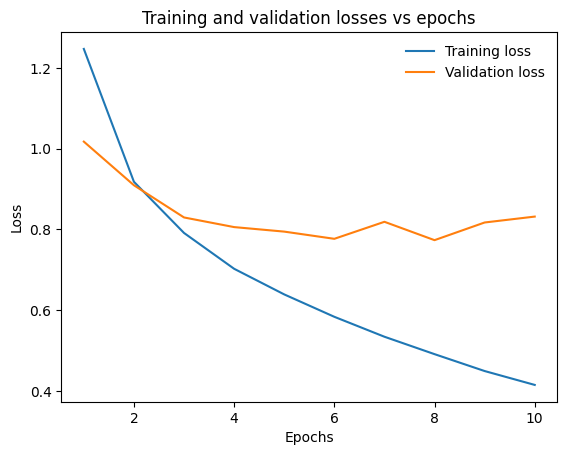

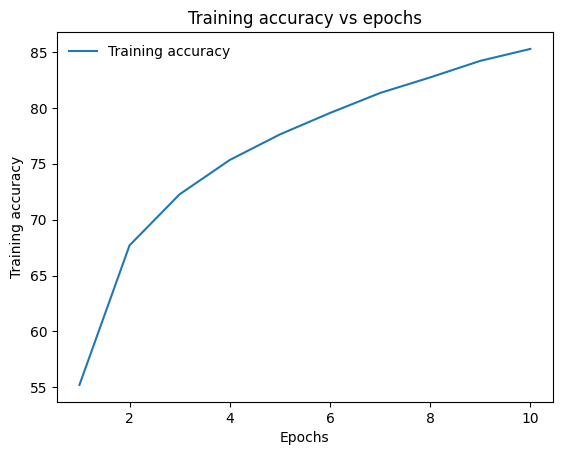

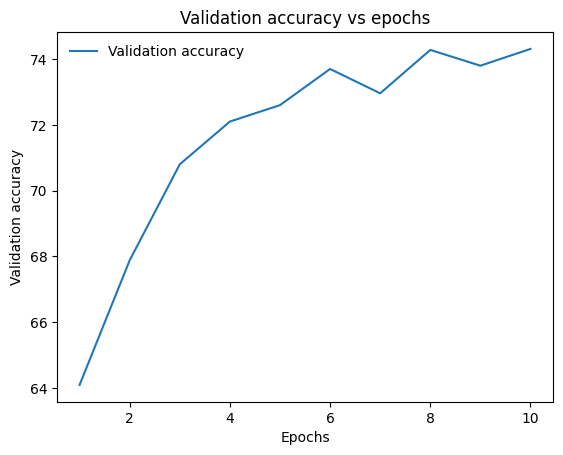

Accuracy for class: plane is 78.2 %
Accuracy for class: car   is 83.9 %
Accuracy for class: bird  is 60.3 %
Accuracy for class: cat   is 52.2 %
Accuracy for class: deer  is 68.4 %
Accuracy for class: dog   is 64.5 %
Accuracy for class: frog  is 88.9 %
Accuracy for class: horse is 78.7 %
Accuracy for class: ship  is 82.3 %
Accuracy for class: truck is 85.7 %


74.31

In [3]:
model_testing(0.001,10,32)

## Adding more Conv Layers

cpu
Model with learning rate:  0.001  epochs:  10  batch size:  32  optimizer:  adam  data augmentation:  True  loss function:  cross_entropy  learning rate scheduler:  False
Files already downloaded and verified
Files already downloaded and verified
Epoch 1 train loss: 1.401 val loss: 1.070 train accuracy: 48.406 val accuracy: 61.610
Epoch 2 train loss: 0.947 val loss: 0.865 train accuracy: 66.142 val accuracy: 69.910
Epoch 3 train loss: 0.758 val loss: 0.863 train accuracy: 73.488 val accuracy: 70.360
Epoch 4 train loss: 0.623 val loss: 0.827 train accuracy: 77.896 val accuracy: 72.010
Epoch 5 train loss: 0.515 val loss: 0.801 train accuracy: 81.762 val accuracy: 73.850
Epoch 6 train loss: 0.425 val loss: 0.824 train accuracy: 84.912 val accuracy: 74.260
Epoch 7 train loss: 0.346 val loss: 0.894 train accuracy: 87.842 val accuracy: 74.090
Epoch 8 train loss: 0.290 val loss: 0.949 train accuracy: 89.540 val accuracy: 74.640
Epoch 9 train loss: 0.241 val loss: 0.978 train accuracy: 91.

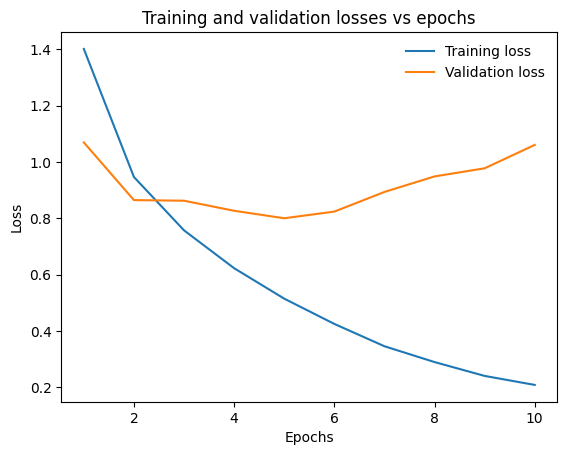

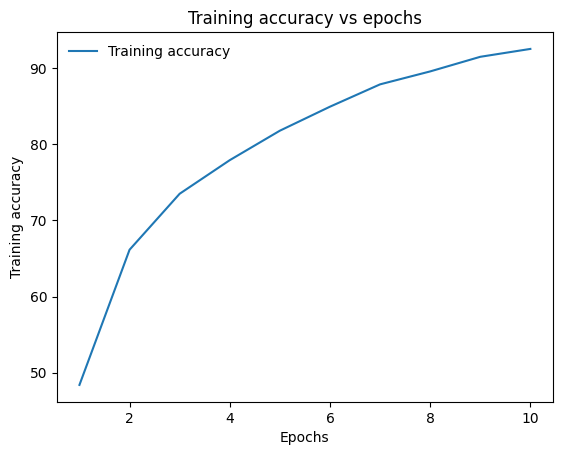

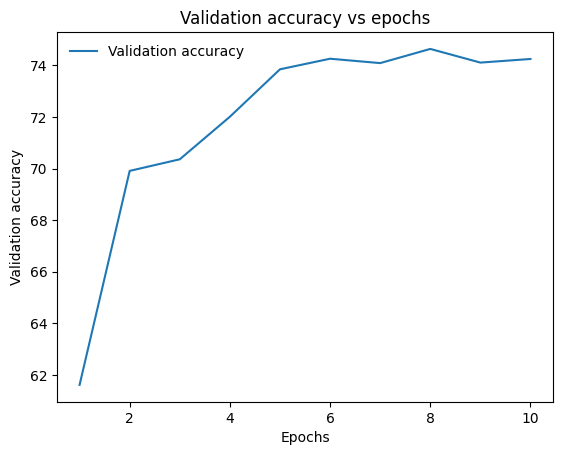

Accuracy for class: plane is 78.4 %
Accuracy for class: car   is 82.7 %
Accuracy for class: bird  is 64.4 %
Accuracy for class: cat   is 55.0 %
Accuracy for class: deer  is 74.5 %
Accuracy for class: dog   is 67.9 %
Accuracy for class: frog  is 78.9 %
Accuracy for class: horse is 74.2 %
Accuracy for class: ship  is 86.3 %
Accuracy for class: truck is 80.2 %
Overall Validation accuracy: 74.250


In [27]:
# Training on GPU

import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

# net.to(device)

# inputs, labels = data[0].to(device), data[1].to(device)





if device == 'cuda':
  usegpu = True
else:
  usegpu = False

# Load the cifar10 dataset

import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt









def model_testing(learning_rate, epochs, batch_size, opti = 'adam', loss_func = 'cross_entropy' , data_augmentation = True, lrscheduler = False):

    print("Model with learning rate: ", learning_rate, " epochs: ", epochs, " batch size: ", batch_size, " optimizer: ", opti, " data augmentation: ", data_augmentation, " loss function: ", loss_func, " learning rate scheduler: ", lrscheduler)

    # Data augmentation
    if data_augmentation == True:

        transform = transforms.Compose(
            [transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    else:
        transform = transforms.Compose(
            [transforms.ToTensor(),
            transforms.Normalize((1, 1, 1), (1, 1, 1))])
             



    # batch_size = 32

    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                            shuffle=True, num_workers=2)

    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                            shuffle=False, num_workers=2)

    classes = ('plane', 'car', 'bird', 'cat',
            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')




    # # Displaying some images from the dataset

    # import matplotlib.pyplot as plt
    # import numpy as np

    # # functions to show an image


    # def imshow(img):
    #     img = img / 2 + 0.5     # unnormalize
    #     npimg = img.numpy()
    #     plt.imshow(np.transpose(npimg, (1, 2, 0)))
    #     plt.show()


    # # get some random training images
    # dataiter = iter(trainloader)
    # images, labels = next(dataiter)

    # # show images
    # imshow(torchvision.utils.make_grid(images))
    # # print labels
    # print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))





    # Defining the CNN

    # CONV1: Kernel size (3 × 3), In channels 3, Out channels 32.
    # • POOL1: Kernel size (2 × 2).

    # • CONV2: Kernel size (5 × 5), In channels 32, Out channels 64.
    # • POOL2: Kernel size (2 × 2).
    # • CONV3: Kernel size (3 × 3), In channels 64, Out channels 64.
    # • FC1: Fully connected layer (also known as Linear layer) with 64 output neurons.
    # • FC2: Fully connected layer with 10 output neurons.

    import torch.nn as nn
    import torch.nn.functional as F


    class Net(nn.Module):
        def __init__(self):
            super(Net, self).__init__()
            self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
            self.conv2 = nn.Conv2d(32, 64, 5, padding=2)
            self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
            self.conv4 = nn.Conv2d(128, 256, 3, padding=1)
            self.fc1 = nn.Linear(256 * 2 * 2, 512)
            self.fc2 = nn.Linear(512, 10)
            self.relu = nn.ReLU()
            self.maxpool = nn.MaxPool2d(2, 2)

        def forward(self, x):
            x = self.conv1(x)
            x = self.relu(x)
            x = self.maxpool(x)
            x = self.conv2(x)
            x = self.relu(x)
            x = self.maxpool(x)
            x = self.conv3(x)
            x = self.relu(x)
            x = self.maxpool(x)
            x = self.conv4(x)
            x = self.relu(x)
            x = self.maxpool(x)
            x = x.view(x.size(0), -1)
            x = self.fc1(x)
            x = self.relu(x)
            x = self.fc2(x)
            return x    


    net = Net()

    # Tranferring the model to the GPU
    if usegpu:
        net.to(device)


    # Define the loss function and optimizer
    import torch.optim as optim

    if loss_func == 'cross_entropy':
        criterion = nn.CrossEntropyLoss()
    elif loss_func == 'kl_divergence':
        criterion = nn.KLDivLoss(reduction='batchmean')
    elif loss_func == 'mse':
        criterion = nn.MSELoss()

    # optimizer = optim.Adam(net.parameters(), lr=0.001)
    
    if opti == 'adam':
        optimizer = optim.Adam(net.parameters(), lr=learning_rate)
    elif opti == 'sgd':
        optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)


    if lrscheduler == True:
        

    # Variable learning rate scheduler
        
        from torch.optim.lr_scheduler import ExponentialLR

        scheduler = ExponentialLR(optimizer, gamma = 0.5) # Multiplicative factor of learning rate decay

    # Fixed learning rate scheduler

        # from torch.optim.lr_scheduler import StepLR
        
        # scheduler = StepLR(optimizer, step_size=10, gamma=0.5) # Decay LR by a factor of 0.5 every 10 epochs












    # Training and validation losses
    train_losses  = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []
    epoch_list = []

    learning_rates = []

    # Train the network 

    for epoch in range(epochs):  # loop over the dataset multiple times

        epoch_list.append(epoch+1)
        running_loss = 0.0
        total = 0
        correct=0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            # For transferring the data to GPU. Comment this line if running on gpu
            if usegpu:
                inputs, labels = data[0].to(device), data[1].to(device)
            # zero the parameter gradients
            optimizer.zero_grad()
            # forward + backward + optimize
            outputs = net(inputs)
            
            if loss_func == 'kl_divergence':
                loss = criterion(F.log_softmax(outputs, dim=1), F.softmax(outputs, dim=1))

            else:
                loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            

            total += labels.size(0)
            correct += (torch.argmax(outputs, dim=1) == labels).sum().item()



            # print statistics
            running_loss += loss.item() 
            
        if lrscheduler == True:

            learning_rates.append(optimizer.param_groups[0]['lr'])
            scheduler.step()

        train_loss = running_loss/len(trainloader)
        train_losses.append(train_loss)
        train_accuracy = 100 * correct / total
        train_accuracies.append(train_accuracy)
        
        

        # Calculating the validation loss
        running_val_loss = 0.0
        total = 0
        correct=0
        with torch.no_grad():
            for i, data in enumerate(testloader, 0):
                inputs, labels = data
                # For transferring the data to GPU. Comment this line if running on gpu
                if usegpu:
                    inputs, labels = data[0].to(device), data[1].to(device)
                outputs = net(inputs)
                if loss_func == 'kl_divergence':
                  loss = criterion(F.log_softmax(outputs, dim=1), F.softmax(outputs, dim=1))
                else:
                  loss = criterion(outputs, labels)
                running_val_loss += loss.item()

                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        
        val_loss = running_val_loss/len(testloader)
        val_losses.append(val_loss)
        val_accuracy = 100 * correct / total
        val_accuracies.append(val_accuracy)
        

        print(f'Epoch {epoch + 1} train loss: {train_loss:.3f} val loss: {val_loss:.3f} train accuracy: {train_accuracy:.3f} val accuracy: {val_accuracy:.3f}')
        
    







    print('Finished Training')


    # Plotting the learning rate scheduler
    
    if lrscheduler == True:
        
        # Visualise the learning rate scheduler
        from matplotlib.ticker import MultipleLocator
        fig, ax = plt.subplots(1,1, figsize=(10,5))
        ax.plot(epoch_list, learning_rates)
        ax.xaxis.set_major_locator(MultipleLocator(1))
        ax.set_xlabel('Epochs')
        ax.set_ylabel('Learning rate')
        ax.set_title('Learning rate scheduler')
        plt.show()


    # Plotting the training and validation losses
    plt.plot(epoch_list, train_losses, label='Training loss')
    plt.plot(epoch_list, val_losses, label='Validation loss')
    plt.title('Training and validation losses vs epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(frameon=False)
    plt.show()




    # Plotting the training accuracies
    plt.plot(epoch_list, train_accuracies, label='Training accuracy')
    plt.title('Training accuracy vs epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Training accuracy')
    plt.legend(frameon=False)
    plt.show()


    # Plotting the validation accuracies vs epochs
    plt.plot(epoch_list, val_accuracies, label='Validation accuracy')
    plt.title('Validation accuracy vs epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Validation accuracy')
    plt.legend(frameon=False)
    plt.show()



    









    # Save the trained model

    PATH = './cifar_net.pth'
    torch.save(net.state_dict(), PATH)












    # Test the model




    # # Display some images from the test set
    # dataiter = iter(testloader)
    # images, labels = next(dataiter)

    # # print images
    # imshow(torchvision.utils.make_grid(images))
    # print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))


    # # For transferring the data to GPU. Comment this line if running on gpu
    # if usegpu:
    #   images, labels = data[0].to(device), data[1].to(device)


    # # Load the saved model

    # net = Net()
    # net.load_state_dict(torch.load(PATH))

    # # Transfer the model to the GPU
    # if usegpu:
    #   net.to(device)



    # # Predict the classes of the test set

    # outputs = net(images)



    # # Print the class with highest energy value for some test images

    # _, predicted = torch.max(outputs, 1)

    # print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
    #                               for j in range(4)))

    # # Calculating the accuracy of our model on the test set

    # correct = 0
    # total = 0

    # # since we're not training, we don't need to calculate the gradients for our outputs
    # with torch.no_grad():
    #     for data in testloader:
    #         images, labels = data


    #         # For transferring the data to GPU. Comment this line if running on gpu
    #         if usegpu:
    #           images, labels = data[0].to(device), data[1].to(device)


    #         # calculate outputs by running images through the network
    #         outputs = net(images)
    #         # the class with the highest energy is what we choose as prediction
    #         _, predicted = torch.max(outputs.data, 1)
    #         total += labels.size(0)
    #         correct += (predicted == labels).sum().item()

    # print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')








    # Analysing the class wise results


    # prepare to count predictions for each class
    correct_pred = {classname: 0 for classname in classes}
    total_pred = {classname: 0 for classname in classes}

    # again no gradients needed
    with torch.no_grad():
        for data in testloader:
            images, labels = data


            # For transferring the data to GPU. Comment this line if running on gpu
            if usegpu:
                images, labels = data[0].to(device), data[1].to(device)

            outputs = net(images)
            _, predictions = torch.max(outputs, 1)
            # collect the correct predictions for each class
            for label, prediction in zip(labels, predictions):
                if label == prediction:
                    correct_pred[classes[label]] += 1
                total_pred[classes[label]] += 1


    # print accuracy for each class
    for classname, correct_count in correct_pred.items():
        accuracy = 100 * float(correct_count) / total_pred[classname]
        print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')


        # return the overall validation accuracy

    return val_accuracy



val_acc = model_testing(0.001, 10, 32)
print(f'Overall Validation accuracy: {val_acc:.3f}')

## Using dropout to prevent overfitting

cuda
Model with learning rate:  0.001  epochs:  10  batch size:  32  optimizer:  adam  data augmentation:  True  loss function:  cross_entropy  learning rate scheduler:  False


100%|██████████| 170498071/170498071 [00:13<00:00, 13054424.86it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Epoch 1 train loss: 1.429 val loss: 1.064 train accuracy: 47.558 val accuracy: 61.870
Epoch 2 train loss: 0.948 val loss: 0.877 train accuracy: 66.456 val accuracy: 69.080
Epoch 3 train loss: 0.742 val loss: 0.828 train accuracy: 74.020 val accuracy: 72.010
Epoch 4 train loss: 0.616 val loss: 0.755 train accuracy: 78.266 val accuracy: 74.540
Epoch 5 train loss: 0.519 val loss: 0.774 train accuracy: 81.740 val accuracy: 75.220
Epoch 6 train loss: 0.434 val loss: 0.850 train accuracy: 84.654 val accuracy: 73.980
Epoch 7 train loss: 0.367 val loss: 0.881 train accuracy: 86.882 val accuracy: 74.080
Epoch 8 train loss: 0.318 val loss: 0.879 train accuracy: 88.806 val accuracy: 75.450
Epoch 9 train loss: 0.273 val loss: 0.972 train accuracy: 90.276 val accuracy: 74.640
Epoch 10 train loss: 0.241 val loss: 1.025 train accuracy: 91.440 val accuracy: 74.850
Finished Training


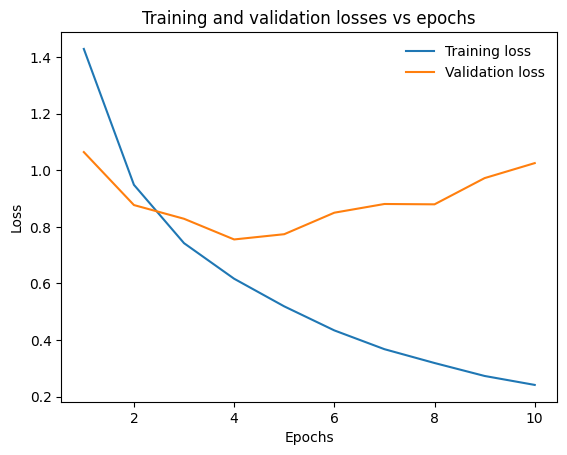

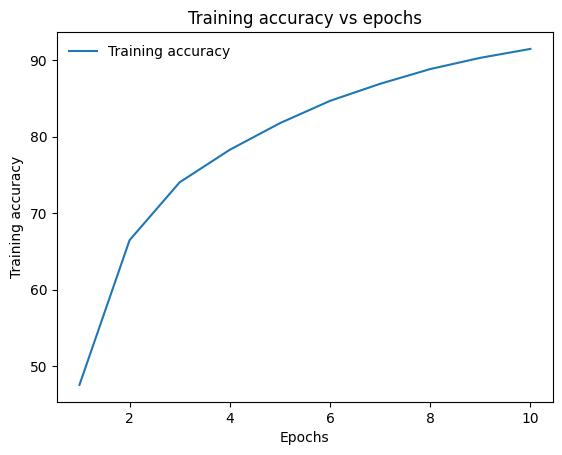

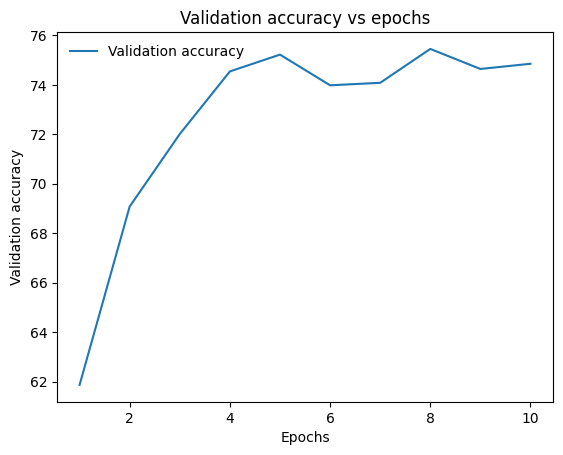

Accuracy for class: plane is 84.8 %
Accuracy for class: car   is 88.2 %
Accuracy for class: bird  is 61.8 %
Accuracy for class: cat   is 56.7 %
Accuracy for class: deer  is 71.8 %
Accuracy for class: dog   is 64.4 %
Accuracy for class: frog  is 74.1 %
Accuracy for class: horse is 78.8 %
Accuracy for class: ship  is 83.0 %
Accuracy for class: truck is 84.5 %
Overall Validation accuracy: 74.850


In [1]:
# Training on GPU

import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

# net.to(device)

# inputs, labels = data[0].to(device), data[1].to(device)





if device == 'cuda':
  usegpu = True
else:
  usegpu = False

# Load the cifar10 dataset

import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt









def model_testing(learning_rate, epochs, batch_size, opti = 'adam', loss_func = 'cross_entropy' , data_augmentation = True, lrscheduler = False):

    print("Model with learning rate: ", learning_rate, " epochs: ", epochs, " batch size: ", batch_size, " optimizer: ", opti, " data augmentation: ", data_augmentation, " loss function: ", loss_func, " learning rate scheduler: ", lrscheduler)

    # Data augmentation
    if data_augmentation == True:

        transform = transforms.Compose(
            [transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    else:
        transform = transforms.Compose(
            [transforms.ToTensor(),
            transforms.Normalize((1, 1, 1), (1, 1, 1))])
             



    # batch_size = 32

    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                            shuffle=True, num_workers=2)

    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                            shuffle=False, num_workers=2)

    classes = ('plane', 'car', 'bird', 'cat',
            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')




    # # Displaying some images from the dataset

    # import matplotlib.pyplot as plt
    # import numpy as np

    # # functions to show an image


    # def imshow(img):
    #     img = img / 2 + 0.5     # unnormalize
    #     npimg = img.numpy()
    #     plt.imshow(np.transpose(npimg, (1, 2, 0)))
    #     plt.show()


    # # get some random training images
    # dataiter = iter(trainloader)
    # images, labels = next(dataiter)

    # # show images
    # imshow(torchvision.utils.make_grid(images))
    # # print labels
    # print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))





    # Defining the CNN

    # CONV1: Kernel size (3 × 3), In channels 3, Out channels 32.
    # • POOL1: Kernel size (2 × 2).

    # • CONV2: Kernel size (5 × 5), In channels 32, Out channels 64.
    # • POOL2: Kernel size (2 × 2).
    # • CONV3: Kernel size (3 × 3), In channels 64, Out channels 64.
    # • FC1: Fully connected layer (also known as Linear layer) with 64 output neurons.
    # • FC2: Fully connected layer with 10 output neurons.

    import torch.nn as nn
    import torch.nn.functional as F


    class Net(nn.Module):
        def __init__(self):
            super(Net, self).__init__()
            self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
            self.conv2 = nn.Conv2d(32, 64, 5, padding=2)
            self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
            self.conv4 = nn.Conv2d(128, 256, 3, padding=1)
            self.fc1 = nn.Linear(256 * 2 * 2, 512)
            self.fc2 = nn.Linear(512, 10)
            self.relu = nn.ReLU()
            self.maxpool = nn.MaxPool2d(2, 2)
            self.dropout = nn.Dropout(0.2)

        def forward(self, x):
            x = self.conv1(x)
            x = self.relu(x)
            x = self.maxpool(x)
            x = self.conv2(x)
            x = self.relu(x)
            x = self.maxpool(x)
            x = self.conv3(x)
            x = self.relu(x)
            x = self.maxpool(x)
            x = self.conv4(x)
            x = self.relu(x)
            x = self.maxpool(x)
            x = x.view(x.size(0), -1)
            x = self.fc1(x)
            x = self.relu(x)
            x = self.dropout(x)
            x = self.fc2(x)
            return x    


    net = Net()

    # Tranferring the model to the GPU
    if usegpu:
        net.to(device)


    # Define the loss function and optimizer
    import torch.optim as optim

    if loss_func == 'cross_entropy':
        criterion = nn.CrossEntropyLoss()
    elif loss_func == 'kl_divergence':
        criterion = nn.KLDivLoss(reduction='batchmean')
    elif loss_func == 'mse':
        criterion = nn.MSELoss()

    # optimizer = optim.Adam(net.parameters(), lr=0.001)
    
    if opti == 'adam':
        optimizer = optim.Adam(net.parameters(), lr=learning_rate)
    elif opti == 'sgd':
        optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)


    if lrscheduler == True:
        

    # Variable learning rate scheduler
        
        from torch.optim.lr_scheduler import ExponentialLR

        scheduler = ExponentialLR(optimizer, gamma = 0.5) # Multiplicative factor of learning rate decay

    # Fixed learning rate scheduler

        # from torch.optim.lr_scheduler import StepLR
        
        # scheduler = StepLR(optimizer, step_size=10, gamma=0.5) # Decay LR by a factor of 0.5 every 10 epochs












    # Training and validation losses
    train_losses  = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []
    epoch_list = []

    learning_rates = []

    # Train the network 

    for epoch in range(epochs):  # loop over the dataset multiple times

        epoch_list.append(epoch+1)
        running_loss = 0.0
        total = 0
        correct=0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            # For transferring the data to GPU. Comment this line if running on gpu
            if usegpu:
                inputs, labels = data[0].to(device), data[1].to(device)
            # zero the parameter gradients
            optimizer.zero_grad()
            # forward + backward + optimize
            outputs = net(inputs)
            
            if loss_func == 'kl_divergence':
                loss = criterion(F.log_softmax(outputs, dim=1), F.softmax(outputs, dim=1))

            else:
                loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            

            total += labels.size(0)
            correct += (torch.argmax(outputs, dim=1) == labels).sum().item()



            # print statistics
            running_loss += loss.item() 
            
        if lrscheduler == True:

            learning_rates.append(optimizer.param_groups[0]['lr'])
            scheduler.step()

        train_loss = running_loss/len(trainloader)
        train_losses.append(train_loss)
        train_accuracy = 100 * correct / total
        train_accuracies.append(train_accuracy)
        
        

        # Calculating the validation loss
        running_val_loss = 0.0
        total = 0
        correct=0
        with torch.no_grad():
            for i, data in enumerate(testloader, 0):
                inputs, labels = data
                # For transferring the data to GPU. Comment this line if running on gpu
                if usegpu:
                    inputs, labels = data[0].to(device), data[1].to(device)
                outputs = net(inputs)
                if loss_func == 'kl_divergence':
                  loss = criterion(F.log_softmax(outputs, dim=1), F.softmax(outputs, dim=1))
                else:
                  loss = criterion(outputs, labels)
                running_val_loss += loss.item()

                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        
        val_loss = running_val_loss/len(testloader)
        val_losses.append(val_loss)
        val_accuracy = 100 * correct / total
        val_accuracies.append(val_accuracy)
        

        print(f'Epoch {epoch + 1} train loss: {train_loss:.3f} val loss: {val_loss:.3f} train accuracy: {train_accuracy:.3f} val accuracy: {val_accuracy:.3f}')
        
    







    print('Finished Training')


    # Plotting the learning rate scheduler
    
    if lrscheduler == True:
        
        # Visualise the learning rate scheduler
        from matplotlib.ticker import MultipleLocator
        fig, ax = plt.subplots(1,1, figsize=(10,5))
        ax.plot(epoch_list, learning_rates)
        ax.xaxis.set_major_locator(MultipleLocator(1))
        ax.set_xlabel('Epochs')
        ax.set_ylabel('Learning rate')
        ax.set_title('Learning rate scheduler')
        plt.show()


    # Plotting the training and validation losses
    plt.plot(epoch_list, train_losses, label='Training loss')
    plt.plot(epoch_list, val_losses, label='Validation loss')
    plt.title('Training and validation losses vs epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(frameon=False)
    plt.show()




    # Plotting the training accuracies
    plt.plot(epoch_list, train_accuracies, label='Training accuracy')
    plt.title('Training accuracy vs epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Training accuracy')
    plt.legend(frameon=False)
    plt.show()


    # Plotting the validation accuracies vs epochs
    plt.plot(epoch_list, val_accuracies, label='Validation accuracy')
    plt.title('Validation accuracy vs epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Validation accuracy')
    plt.legend(frameon=False)
    plt.show()



    









    # Save the trained model

    PATH = './cifar_net.pth'
    torch.save(net.state_dict(), PATH)












    # Test the model




    # # Display some images from the test set
    # dataiter = iter(testloader)
    # images, labels = next(dataiter)

    # # print images
    # imshow(torchvision.utils.make_grid(images))
    # print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))


    # # For transferring the data to GPU. Comment this line if running on gpu
    # if usegpu:
    #   images, labels = data[0].to(device), data[1].to(device)


    # # Load the saved model

    # net = Net()
    # net.load_state_dict(torch.load(PATH))

    # # Transfer the model to the GPU
    # if usegpu:
    #   net.to(device)



    # # Predict the classes of the test set

    # outputs = net(images)



    # # Print the class with highest energy value for some test images

    # _, predicted = torch.max(outputs, 1)

    # print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
    #                               for j in range(4)))

    # # Calculating the accuracy of our model on the test set

    # correct = 0
    # total = 0

    # # since we're not training, we don't need to calculate the gradients for our outputs
    # with torch.no_grad():
    #     for data in testloader:
    #         images, labels = data


    #         # For transferring the data to GPU. Comment this line if running on gpu
    #         if usegpu:
    #           images, labels = data[0].to(device), data[1].to(device)


    #         # calculate outputs by running images through the network
    #         outputs = net(images)
    #         # the class with the highest energy is what we choose as prediction
    #         _, predicted = torch.max(outputs.data, 1)
    #         total += labels.size(0)
    #         correct += (predicted == labels).sum().item()

    # print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')








    # Analysing the class wise results


    # prepare to count predictions for each class
    correct_pred = {classname: 0 for classname in classes}
    total_pred = {classname: 0 for classname in classes}

    # again no gradients needed
    with torch.no_grad():
        for data in testloader:
            images, labels = data


            # For transferring the data to GPU. Comment this line if running on gpu
            if usegpu:
                images, labels = data[0].to(device), data[1].to(device)

            outputs = net(images)
            _, predictions = torch.max(outputs, 1)
            # collect the correct predictions for each class
            for label, prediction in zip(labels, predictions):
                if label == prediction:
                    correct_pred[classes[label]] += 1
                total_pred[classes[label]] += 1


    # print accuracy for each class
    for classname, correct_count in correct_pred.items():
        accuracy = 100 * float(correct_count) / total_pred[classname]
        print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')


        # return the overall validation accuracy

    return val_accuracy



val_acc = model_testing(0.001, 10, 32)
print(f'Overall Validation accuracy: {val_acc:.3f}')